<a href="https://colab.research.google.com/github/Den9p/MO_2/blob/main/%D0%9A%D1%83%D0%B2%D1%88%D0%B0%D0%BD%D0%BE%D0%B2%2C_%D0%9F%D0%BE%D0%BB%D1%8F%D1%80%D1%83%D1%88%2C_%D0%A7%D0%B5%D0%BF%D0%B0%D0%BA_%D0%A2%D1%8E%D0%BC%D0%93%D0%A3_%D0%9C%D0%9E2_%D0%94%D0%97_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Импортируем библиотеки для работы

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import shutil
from google.colab import files

Загружаем датасет

In [4]:
import kagglehub

# Загрузка последней версии датасета
path = kagglehub.dataset_download("ayushtankha/70k-job-applicants-data-human-resource")
print("Path to dataset files:", path)

# Определяем целевой путь
target_path = os.path.join(os.getcwd(), '1')

# Проверяем, существует ли целевой путь, если да - удаляем
if os.path.exists(target_path):
    shutil.rmtree(target_path)

# Перемещаем датасет в текущую рабочую директорию
shutil.move(path, target_path)
print(f"Dataset moved to: {target_path}")

100%|██████████| 2.02M/2.02M [00:00<00:00, 11.4MB/s]


Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/ayushtankha/70k-job-applicants-data-human-resource/versions/1
Dataset moved to: /content/1


Загружаем данные

In [5]:
df = pd.read_csv('/content/1/stackoverflow_full.csv')

Посмотрим на данные

In [6]:
df

,Unnamed: 0,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed
0,0,<35,No,Master,1,Man,No,Dev,7,4,Sweden,51552.0,C++;Python;Git;PostgreSQL,4,0
1,1,<35,No,Undergraduate,1,Man,No,Dev,12,5,Spain,46482.0,Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...,12,1
2,2,<35,No,Master,1,Man,No,Dev,15,6,Germany,77290.0,C;C++;Java;Perl;Ruby;Git;Ruby on Rails,7,0
3,3,<35,No,Undergraduate,1,Man,No,Dev,9,6,Canada,46135.0,Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL;Gi...,13,0
4,4,>35,No,PhD,0,Man,No,NotDev,40,30,Singapore,160932.0,C++;Python,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73457,73457,<35,No,Undergraduate,1,Man,No,Dev,7,2,Germany,41058.0,C#;HTML/CSS;JavaScript;TypeScript;Docker;Kuber...,13,1
73458,73458,>35,No,Undergraduate,1,Man,No,Dev,21,16,United States of America,115000.0,C#;HTML/CSS;Java;JavaScript;npm;ASP.NET Core ;...,11,1
73459,73459,<35,No,Undergraduate,1,Man,No,Dev,4,3,Nigeria,57720.0,HTML/CSS;JavaScript;TypeScript;Docker;Express;...,12,1
73460,73460,<35,Yes,Undergraduate,1,Man,Yes,Dev,5,1,United States of America,70000.0,C#;HTML/CSS;JavaScript;SQL;TypeScript;npm;Yarn...,15,1


Описание столбцов

From the survey results, we have built a dataset with the following columns:

- Age: age of the applicant, >35 years old or <35 years old (categorical)
- EdLevel: education level of the applicant (Undergraduate, Master, PhD…) (categorical)
- Gender: gender of the applicant, (Man, Woman, or NonBinary) (categorical)
- MainBranch: whether the applicant is a profesional developer (categorical)
- YearsCode: how long the applicant has been coding (integer)
- YearsCodePro: how long the applicant has been coding in a professional context, (integer)
- PreviousSalary: the applicant's previous job salary (float)
- ComputerSkills: number of computer skills known by the applicant (integer)
- Employed: **target** variable, whether the applicant has been hired (categorical)

Посчитаем статистику для числовых столбцов

In [7]:
df.describe()

,Unnamed: 0,Employment,YearsCode,YearsCodePro,PreviousSalary,ComputerSkills,Employed
count,73462.000000,73462.000000,73462.000000,73462.000000,73462.000000,73462.000000,73462.000000
mean,36730.500000,0.883096,14.218902,9.098377,67750.260611,13.428221,0.536223
std,21206.797075,0.321308,9.405172,7.960201,49488.142118,7.057835,0.498690
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,18365.250000,1.000000,7.000000,3.000000,28839.000000,8.000000,0.000000
50%,36730.500000,1.000000,12.000000,7.000000,57588.000000,13.000000,1.000000
75%,55095.750000,1.000000,20.000000,12.000000,95979.000000,17.000000,1.000000
max,73461.000000,1.000000,50.000000,50.000000,224000.000000,107.000000,1.000000


Посмотрим на типы данных в столбцах

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73462 entries, 0 to 73461
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      73462 non-null  int64  
 1   Age             73462 non-null  object 
 2   Accessibility   73462 non-null  object 
 3   EdLevel         73462 non-null  object 
 4   Employment      73462 non-null  int64  
 5   Gender          73462 non-null  object 
 6   MentalHealth    73462 non-null  object 
 7   MainBranch      73462 non-null  object 
 8   YearsCode       73462 non-null  int64  
 9   YearsCodePro    73462 non-null  int64  
 10  Country         73462 non-null  object 
 11  PreviousSalary  73462 non-null  float64
 12  HaveWorkedWith  73399 non-null  object 
 13  ComputerSkills  73462 non-null  int64  
 14  Employed        73462 non-null  int64  
dtypes: float64(1), int64(6), object(8)
memory usage: 8.4+ MB


Посмотрим на кол-во уникальных значений в каждой колонке

In [9]:
df.nunique()

,0
Unnamed: 0,73462
Age,2
Accessibility,2
EdLevel,5
Employment,2
Gender,3
MentalHealth,2
MainBranch,2
YearsCode,51
YearsCodePro,51


Посмотрим на все уникальные значения графически и табличкой

Age
Age
<35    47819
>35    25643
Name: count, dtype: int64


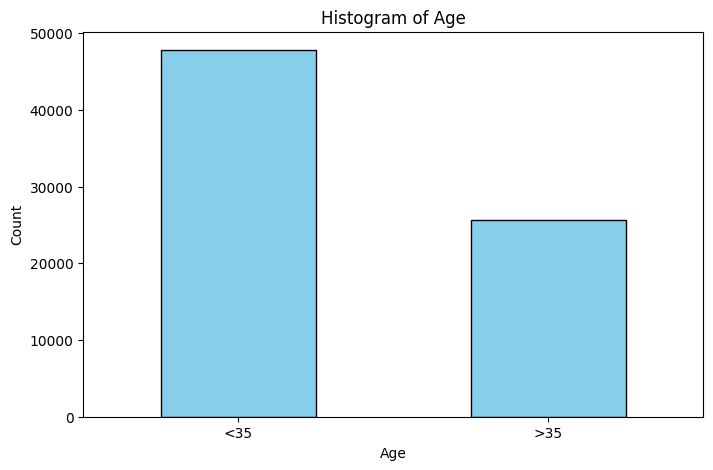

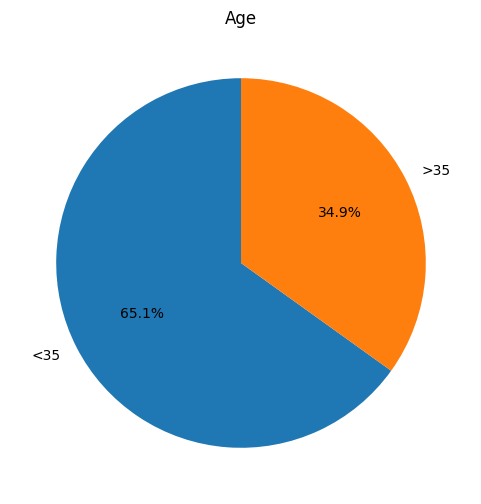

Accessibility
Accessibility
No     71355
Yes     2107
Name: count, dtype: int64


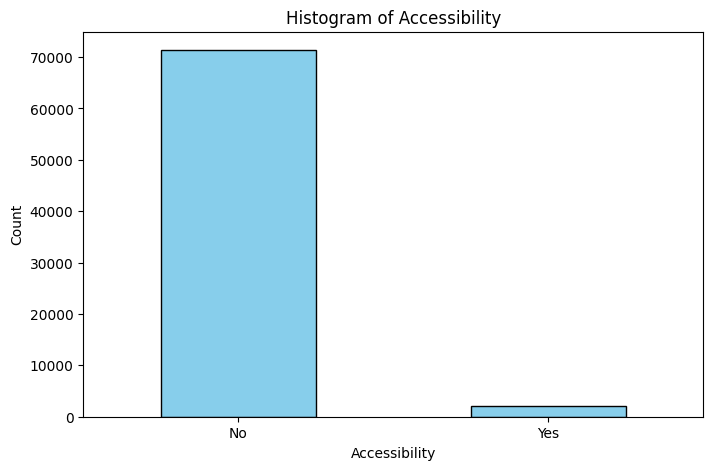

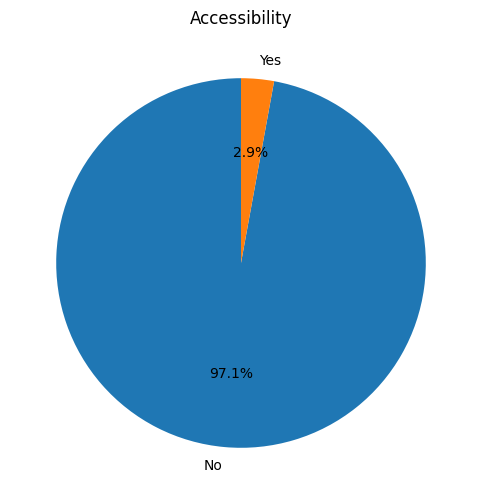

EdLevel
EdLevel
Undergraduate    37402
Master           18903
Other            10843
NoHigherEd        3706
PhD               2608
Name: count, dtype: int64


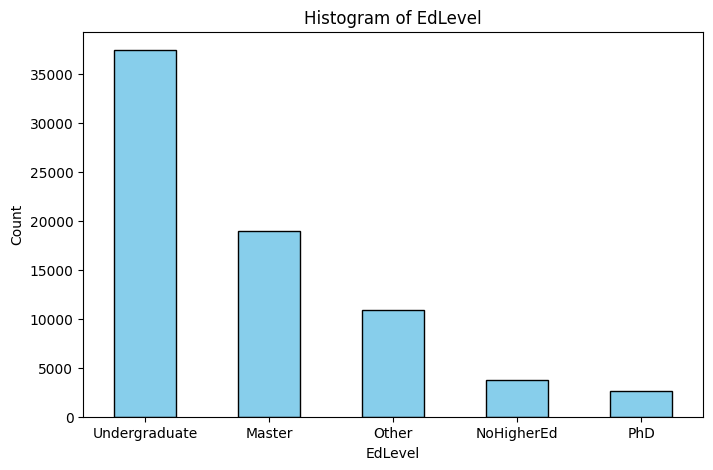

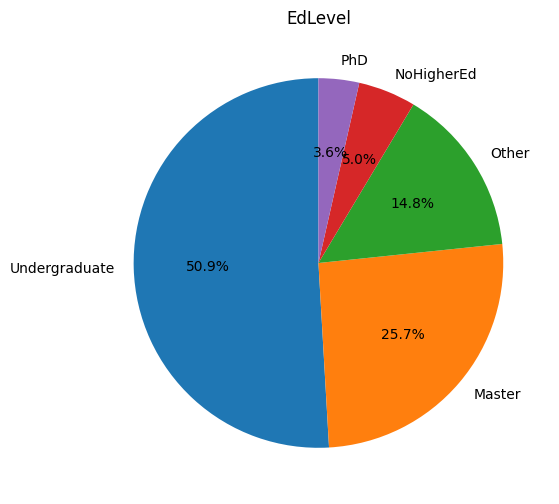

Employment
Employment
1    64874
0     8588
Name: count, dtype: int64


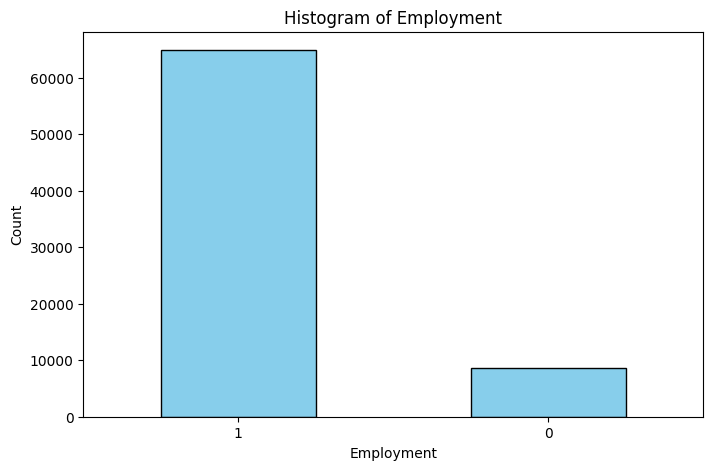

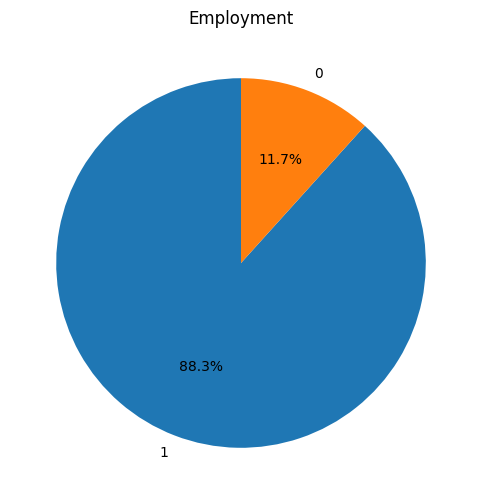

Gender
Gender
Man          68573
Woman         3518
NonBinary     1371
Name: count, dtype: int64


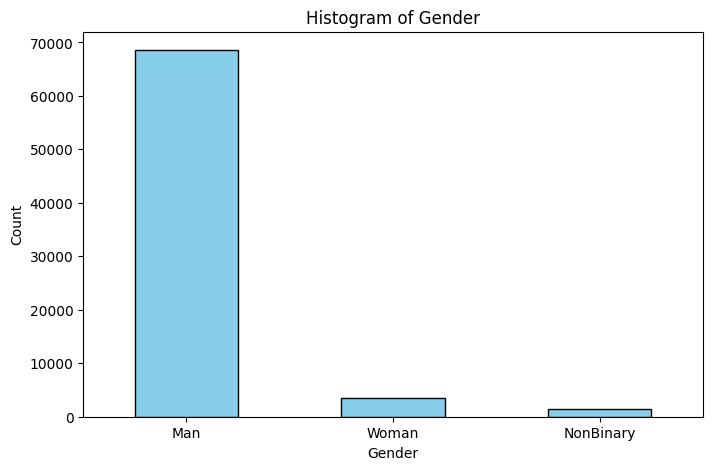

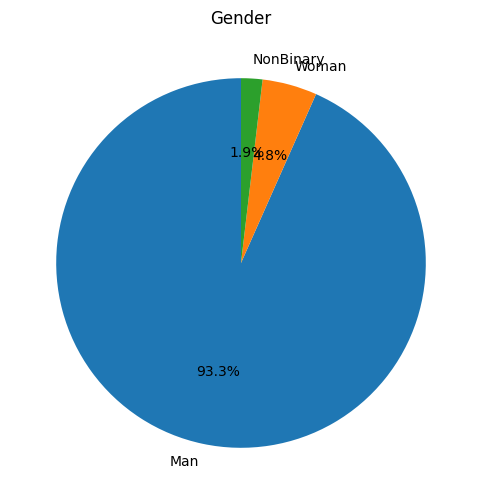

MentalHealth
MentalHealth
No     56944
Yes    16518
Name: count, dtype: int64


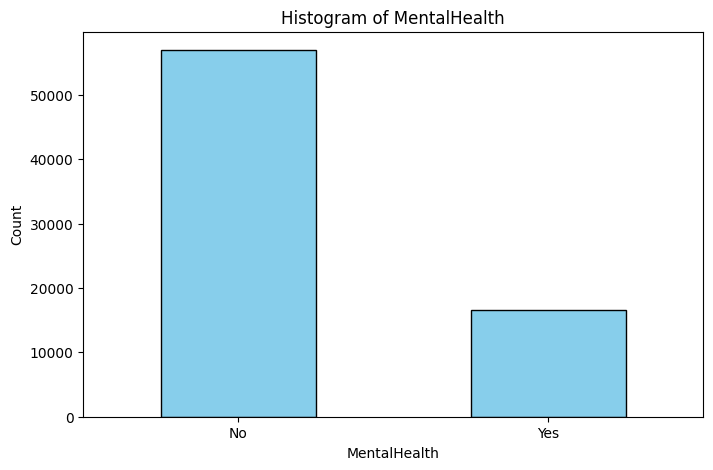

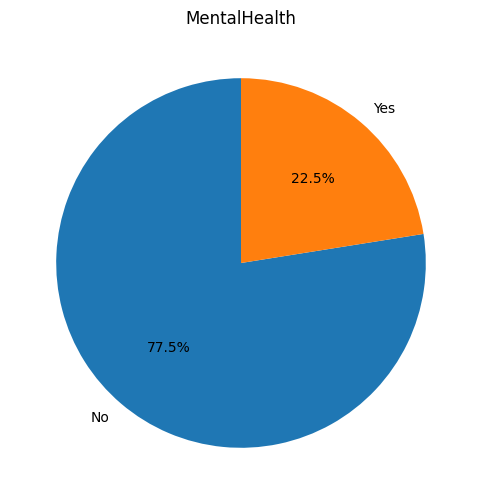

MainBranch
MainBranch
Dev       67396
NotDev     6066
Name: count, dtype: int64


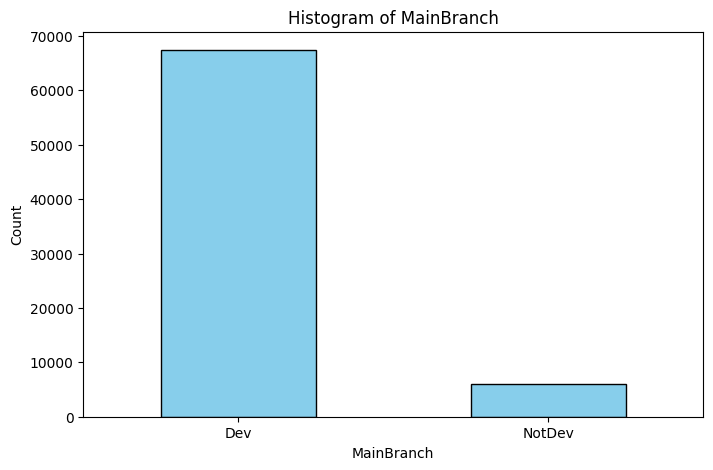

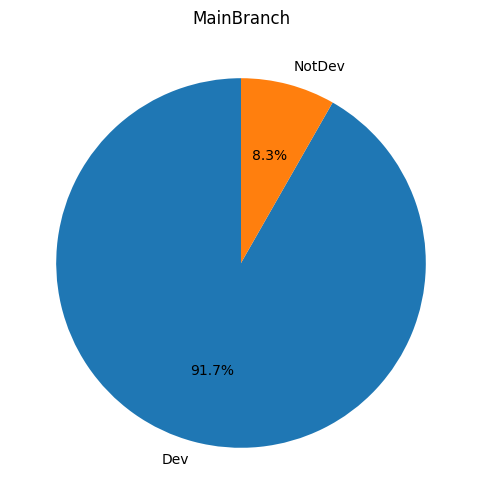

Employed
Employed
1    39392
0    34070
Name: count, dtype: int64


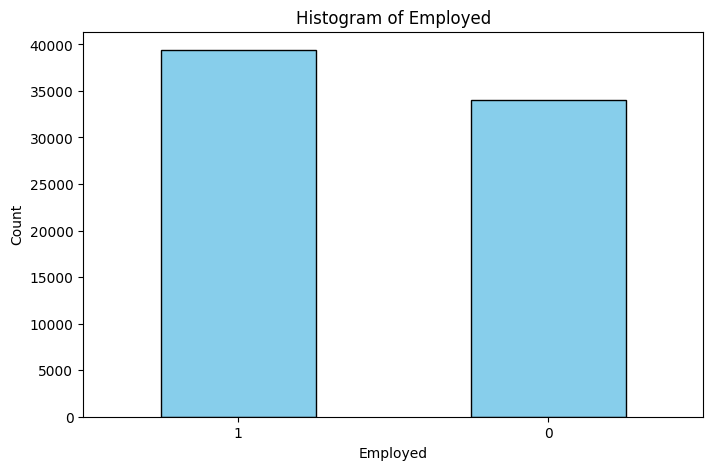

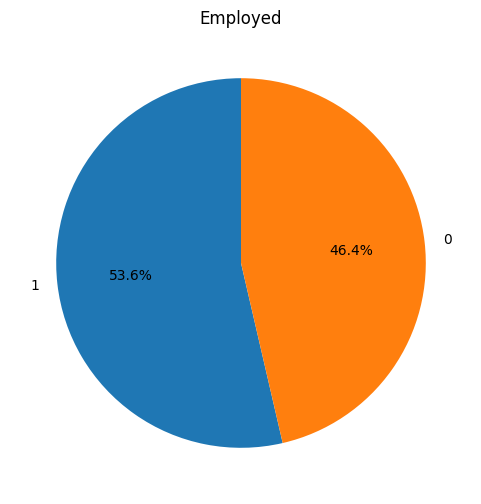

In [16]:
for column_of_interest in ['Age', 'Accessibility', 'EdLevel', 'Employment', 'Gender', 'MentalHealth', 'MainBranch', 'Employed']:
  print(column_of_interest)

  value_counts = df[column_of_interest].value_counts()
  print(value_counts)

  plt.figure(figsize=(8, 5))
  value_counts.plot(kind='bar', color='skyblue', edgecolor='black')
  plt.xlabel(column_of_interest)
  plt.ylabel('Count')
  plt.title(f'Histogram of {column_of_interest}')
  plt.xticks(rotation=0)
  plt.show()

  plt.figure(figsize=(6, 6))
  value_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
  plt.ylabel('')
  plt.title(column_of_interest)
  plt.show()

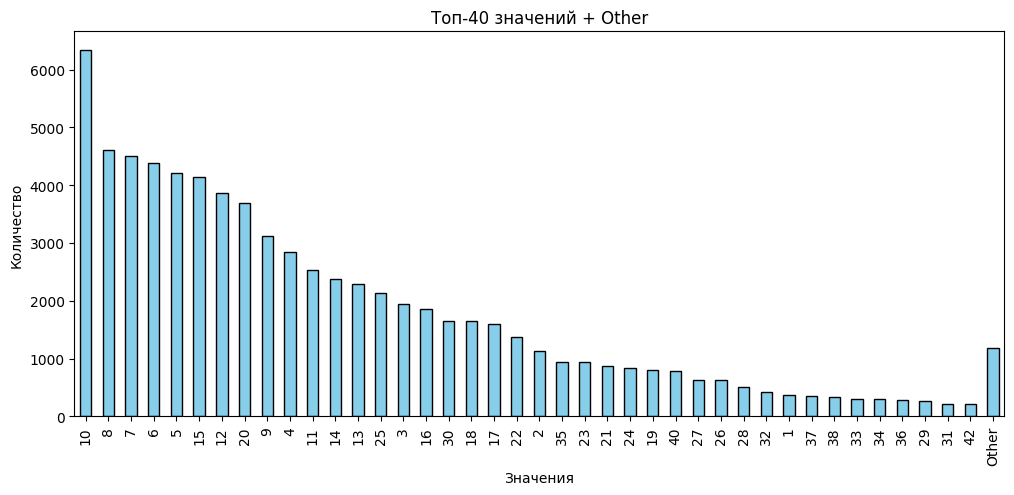

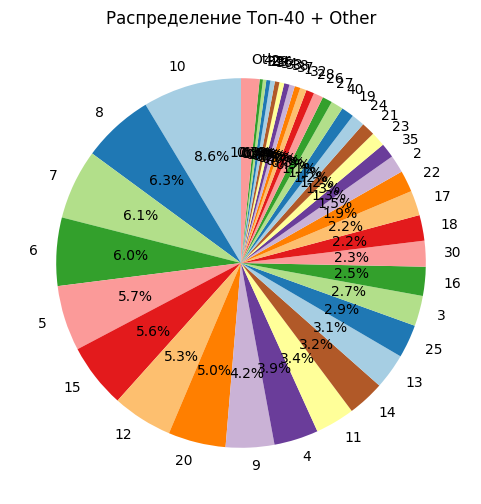

In [28]:
value_counts = df['YearsCode'].value_counts()

top_n = 40
top_values = value_counts.nlargest(top_n)
other_sum = value_counts.iloc[top_n:].sum()

top_values = pd.concat([top_values, pd.Series({'Other': other_sum})])

plt.figure(figsize=(12, 5))
top_values.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Значения')
plt.ylabel('Количество')
plt.title(f'Топ-{top_n} значений + Other')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(6, 6))
top_values.plot(kind='pie', autopct='%1.1f%%', colors=plt.cm.Paired.colors, startangle=90)
plt.ylabel('')
plt.title(f'Распределение Топ-{top_n} + Other')
plt.show()

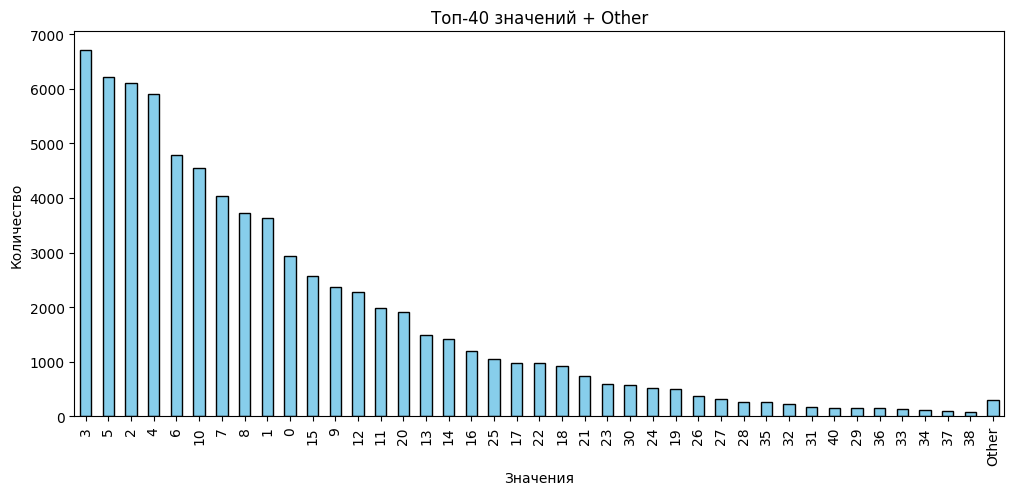

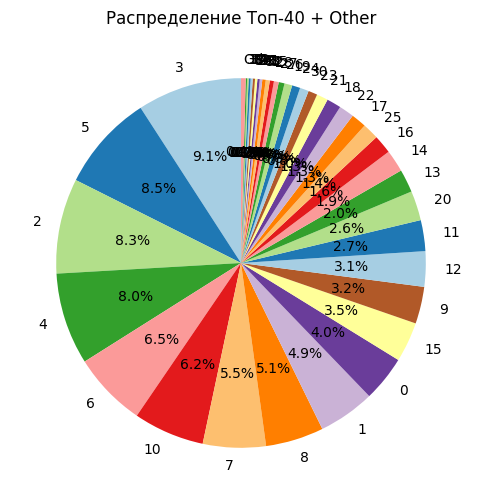

In [29]:
value_counts = df['YearsCodePro'].value_counts()

top_n = 40
top_values = value_counts.nlargest(top_n)
other_sum = value_counts.iloc[top_n:].sum()

top_values = pd.concat([top_values, pd.Series({'Other': other_sum})])

plt.figure(figsize=(12, 5))
top_values.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Значения')
plt.ylabel('Количество')
plt.title(f'Топ-{top_n} значений + Other')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(6, 6))
top_values.plot(kind='pie', autopct='%1.1f%%', colors=plt.cm.Paired.colors, startangle=90)
plt.ylabel('')
plt.title(f'Распределение Топ-{top_n} + Other')
plt.show()

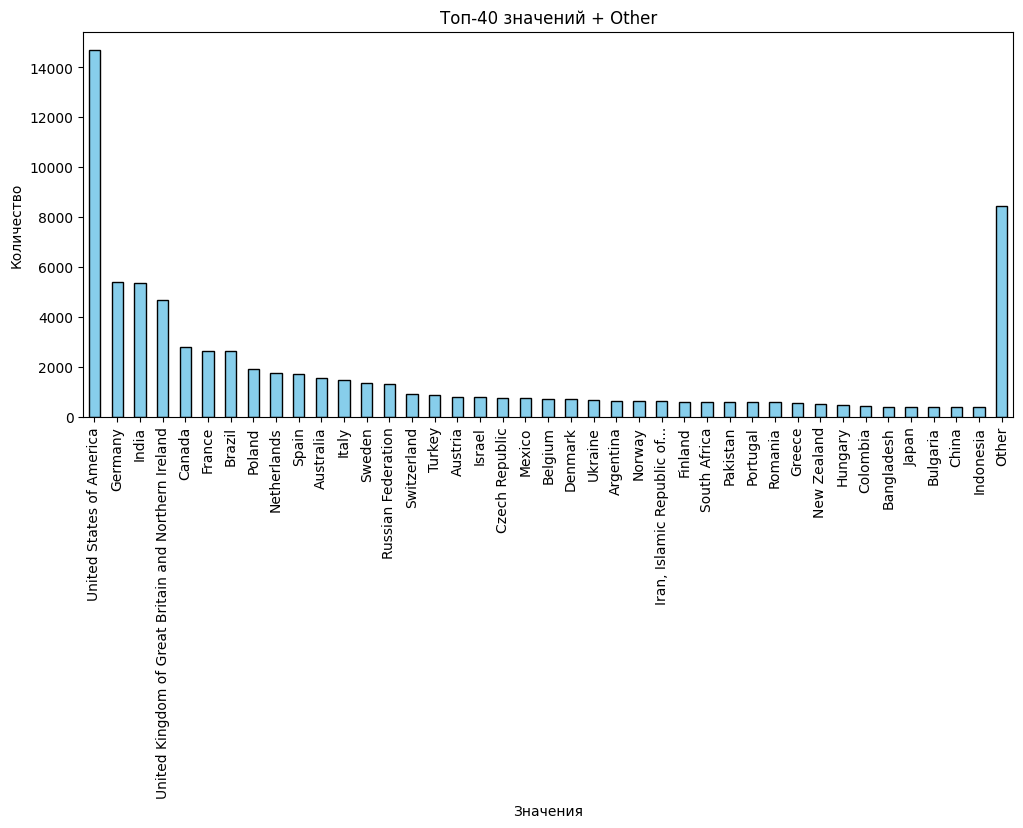

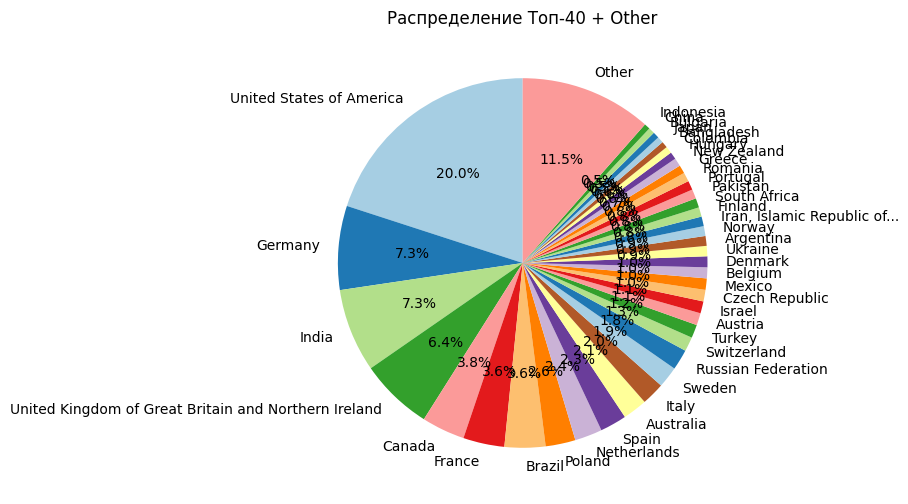

In [30]:
value_counts = df['Country'].value_counts()

top_n = 40
top_values = value_counts.nlargest(top_n)
other_sum = value_counts.iloc[top_n:].sum()

top_values = pd.concat([top_values, pd.Series({'Other': other_sum})])

plt.figure(figsize=(12, 5))
top_values.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Значения')
plt.ylabel('Количество')
plt.title(f'Топ-{top_n} значений + Other')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(6, 6))
top_values.plot(kind='pie', autopct='%1.1f%%', colors=plt.cm.Paired.colors, startangle=90)
plt.ylabel('')
plt.title(f'Распределение Топ-{top_n} + Other')
plt.show()

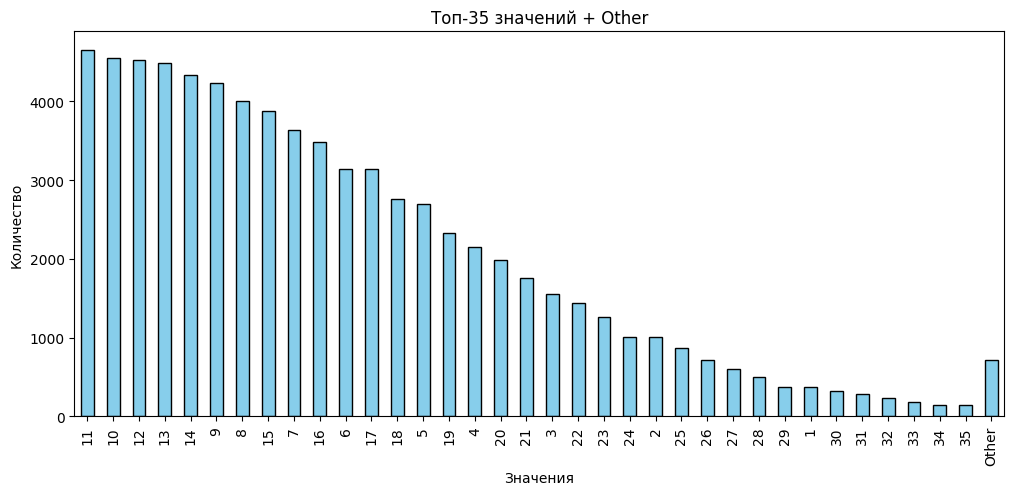

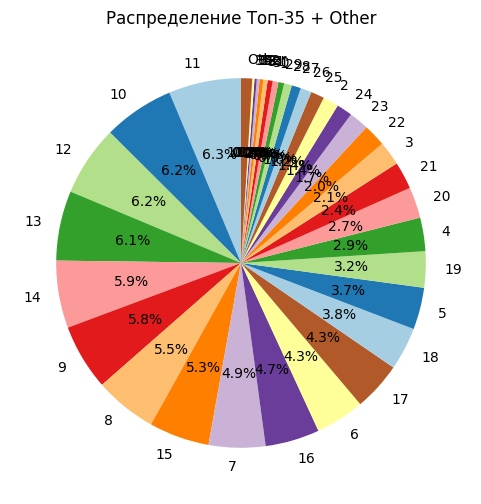

In [32]:
value_counts = df['ComputerSkills'].value_counts()

top_n = 35
top_values = value_counts.nlargest(top_n)
other_sum = value_counts.iloc[top_n:].sum()

top_values = pd.concat([top_values, pd.Series({'Other': other_sum})])

plt.figure(figsize=(12, 5))
top_values.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Значения')
plt.ylabel('Количество')
plt.title(f'Топ-{top_n} значений + Other')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(6, 6))
top_values.plot(kind='pie', autopct='%1.1f%%', colors=plt.cm.Paired.colors, startangle=90)
plt.ylabel('')
plt.title(f'Распределение Топ-{top_n} + Other')
plt.show()

YearsCode
10    6345
8     4606
7     4500
6     4384
5     4204
15    4142
12    3872
20    3697
9     3116
4     2848
11    2532
14    2375
13    2286
25    2140
3     1949
16    1865
30    1656
18    1646
17    1603
22    1377
2     1134
35     941
23     935
21     868
24     845
19     808
40     791
27     631
26     622
28     514
32     413
1      364
37     350
38     342
33     307
34     294
36     290
29     259
31     216
42     210
39     190
0      187
41     166
45     153
43     124
50     122
44     101
46      57
47      35
48      26
49      24
Name: count, dtype: int64


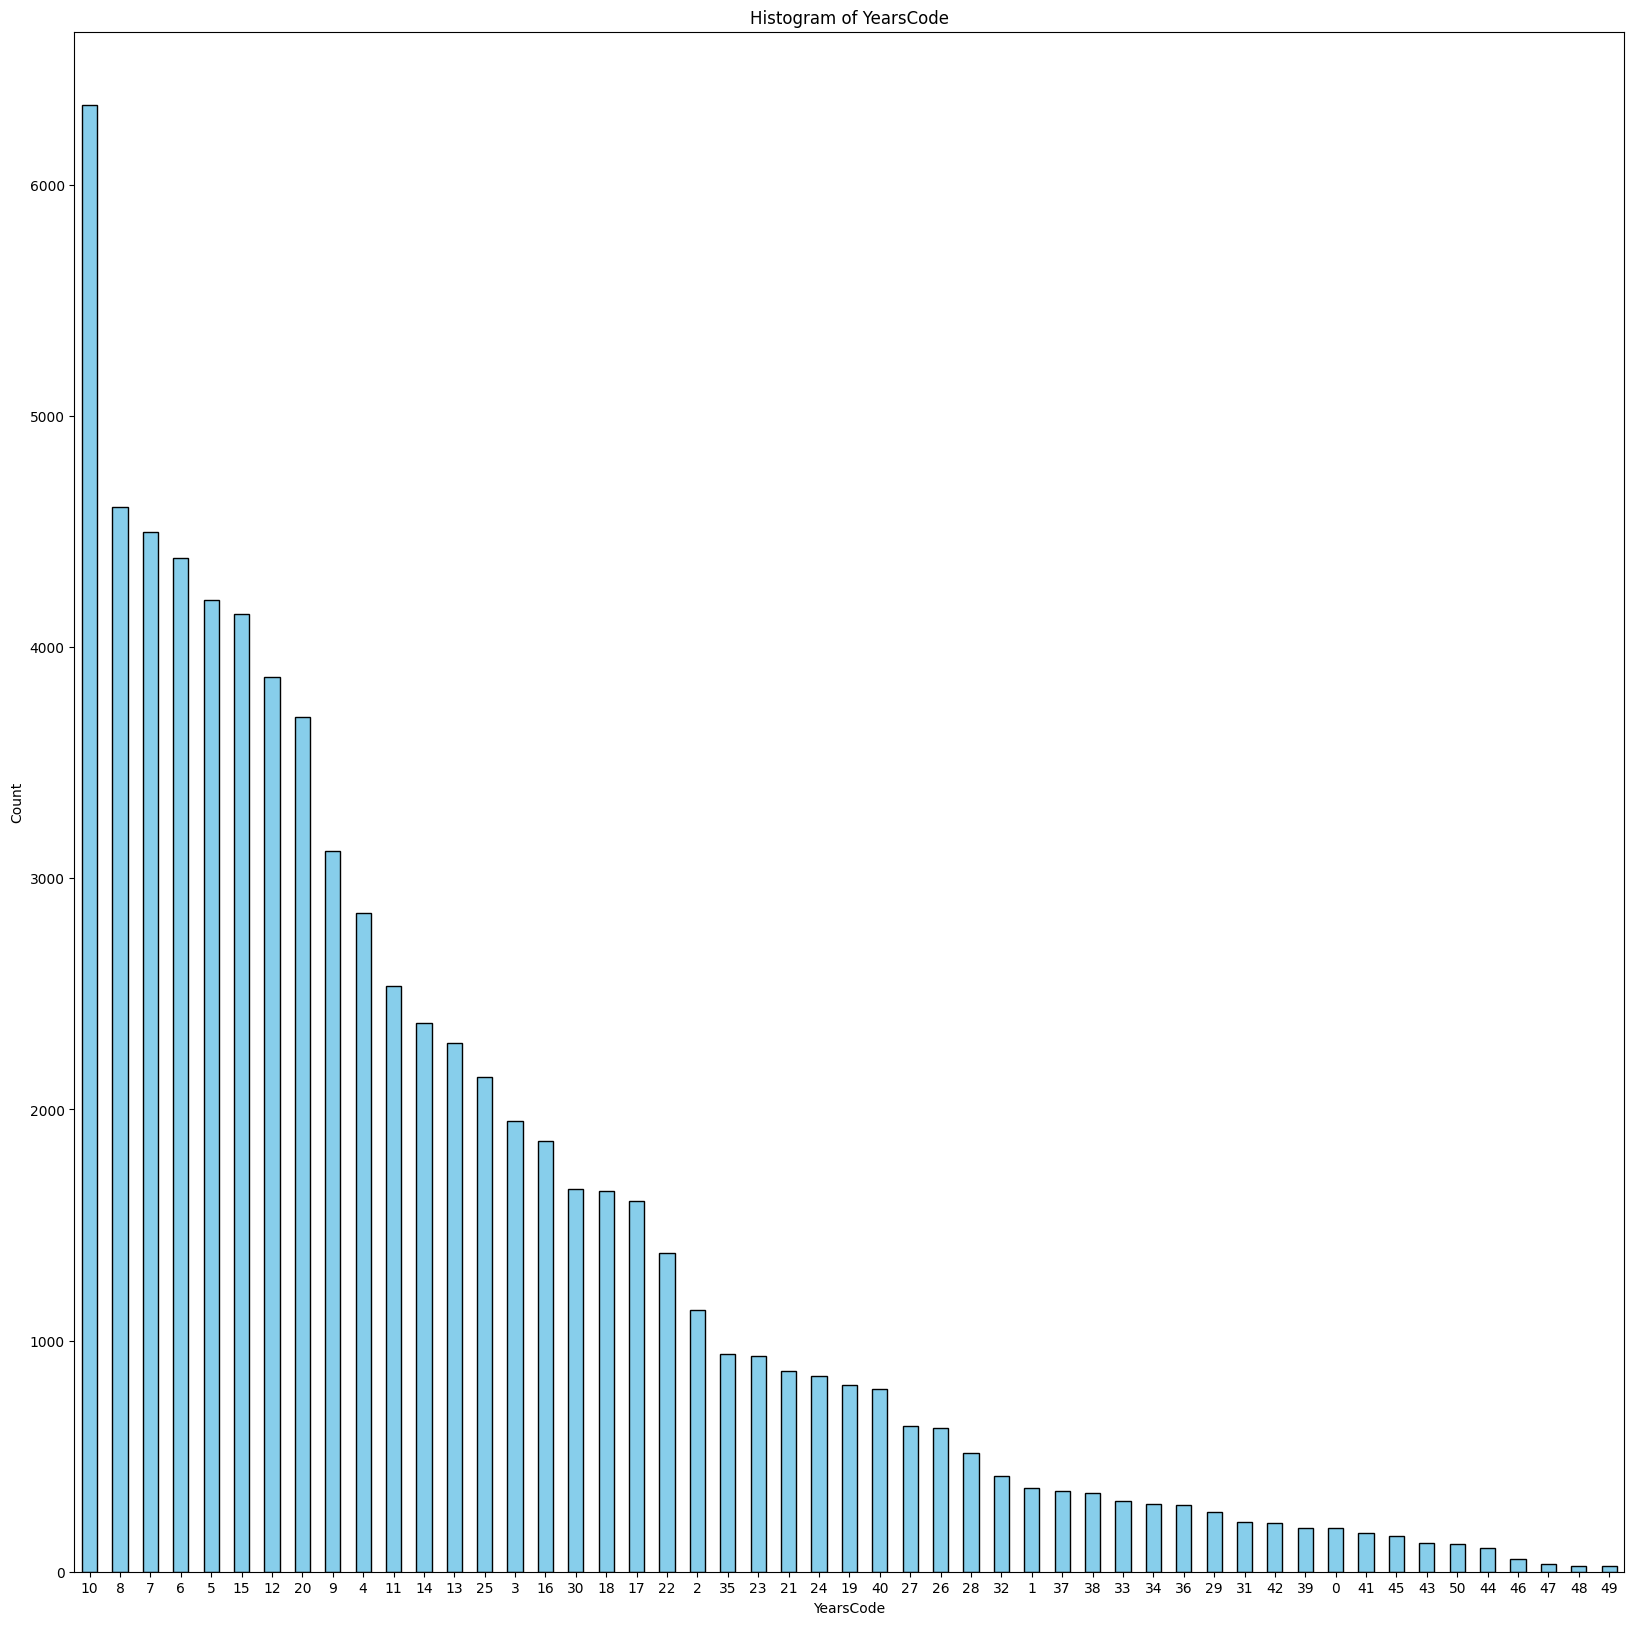

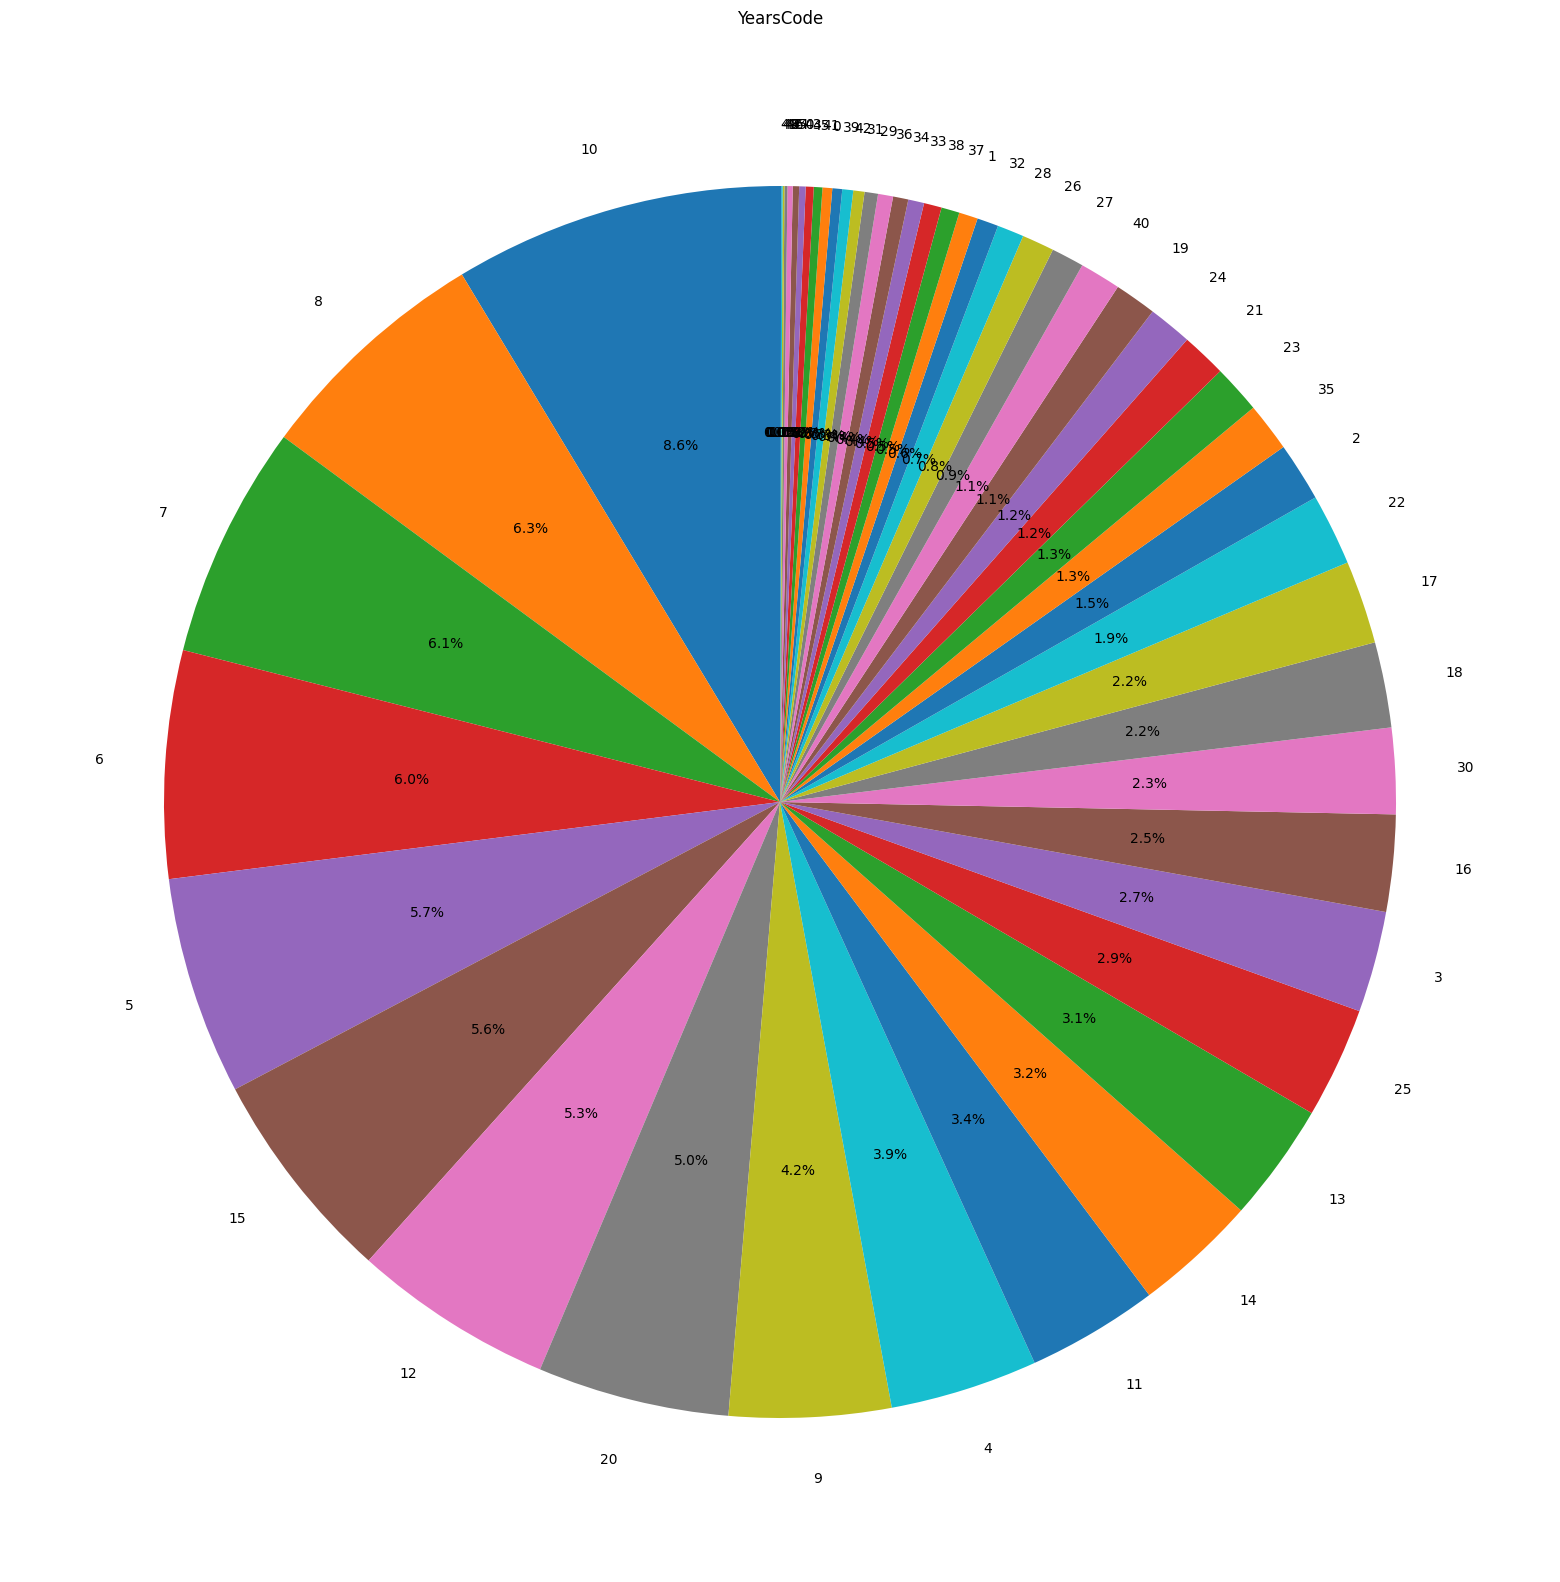

In [24]:
column_of_interest = 'YearsCode'

value_counts = df[column_of_interest].value_counts()
print(value_counts)

plt.figure(figsize=(20, 20))
value_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel(column_of_interest)
plt.ylabel('Count')
plt.title(f'Histogram of {column_of_interest}')
plt.xticks(rotation=0)
plt.show()

plt.figure(figsize=(20, 20))
value_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.ylabel('')
plt.title(column_of_interest)
plt.show()

Age
<35    47819
>35    25643
Name: count, dtype: int64


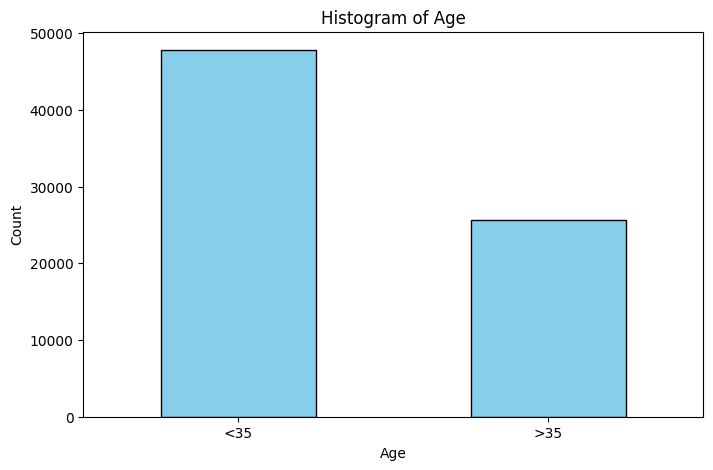

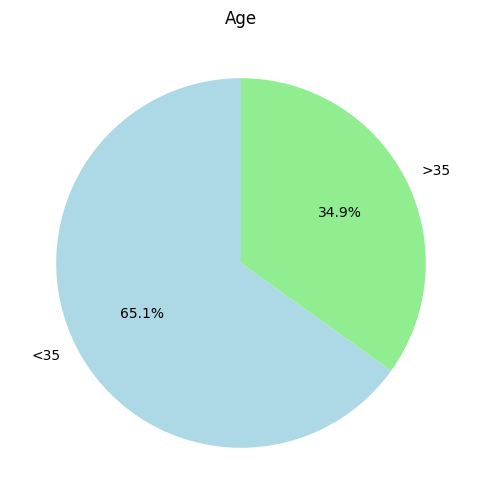

In [15]:
column_of_interest = 'Age'

value_counts = df[column_of_interest].value_counts()
print(value_counts)

plt.figure(figsize=(8, 5))
value_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel(column_of_interest)
plt.ylabel('Count')
plt.title(f'Histogram of {column_of_interest}')
plt.xticks(rotation=0)
plt.show()

plt.figure(figsize=(6, 6))
value_counts.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'lightcoral'], startangle=90)
plt.ylabel('')
plt.title(column_of_interest)
plt.show()

In [13]:
df.columns[1:]

Index(['Age', 'Accessibility', 'EdLevel', 'Employment', 'Gender',
       'MentalHealth', 'MainBranch', 'YearsCode', 'YearsCodePro', 'Country',
       'PreviousSalary', 'HaveWorkedWith', 'ComputerSkills', 'Employed'],
      dtype='object')

Age
Age
<35    47819
>35    25643
Name: count, dtype: int64


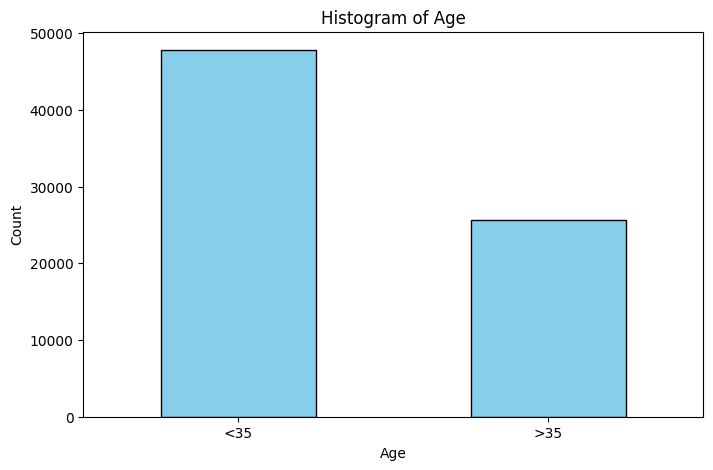

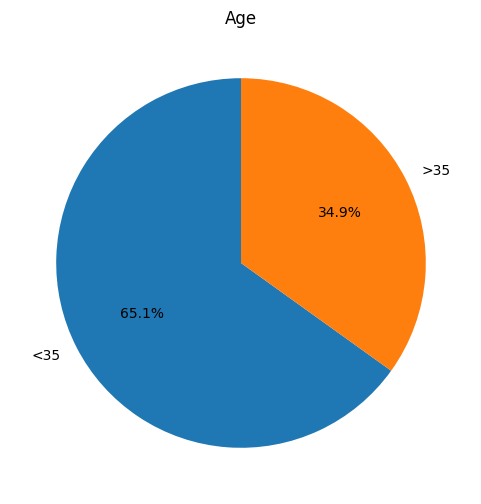

Accessibility
Accessibility
No     71355
Yes     2107
Name: count, dtype: int64


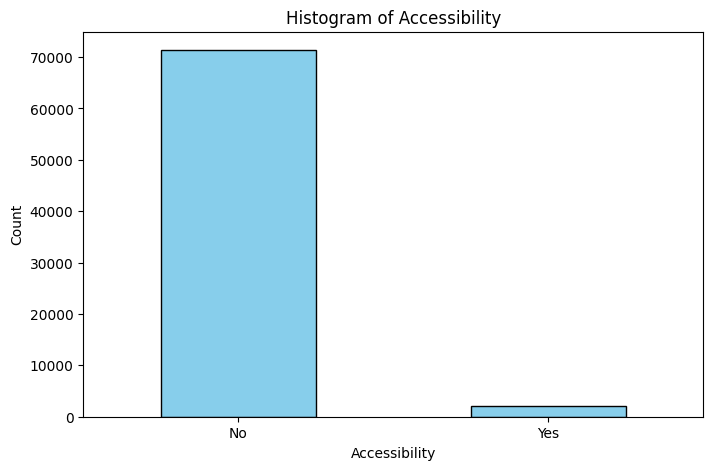

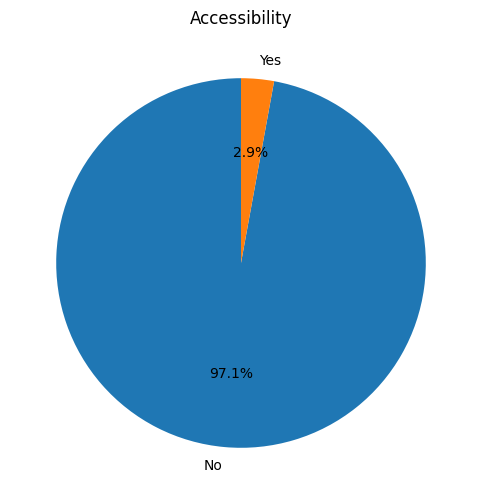

EdLevel
EdLevel
Undergraduate    37402
Master           18903
Other            10843
NoHigherEd        3706
PhD               2608
Name: count, dtype: int64


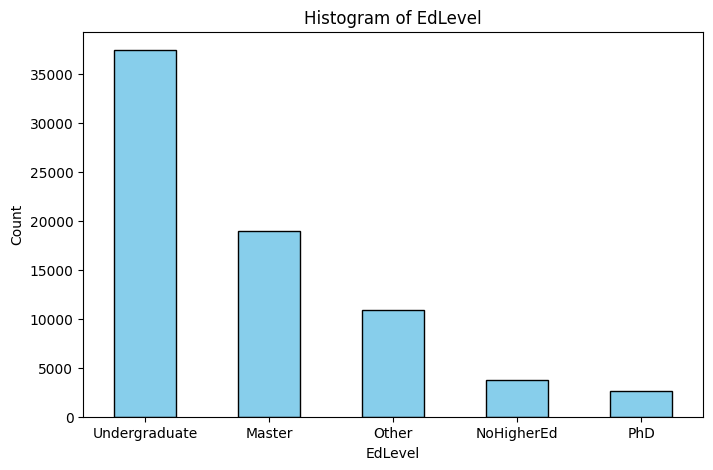

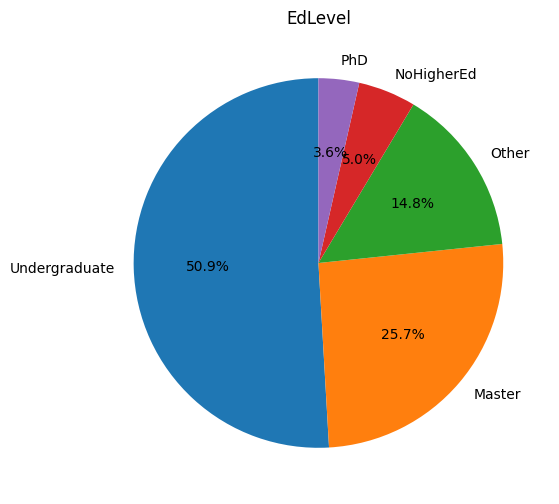

Employment
Employment
1    64874
0     8588
Name: count, dtype: int64


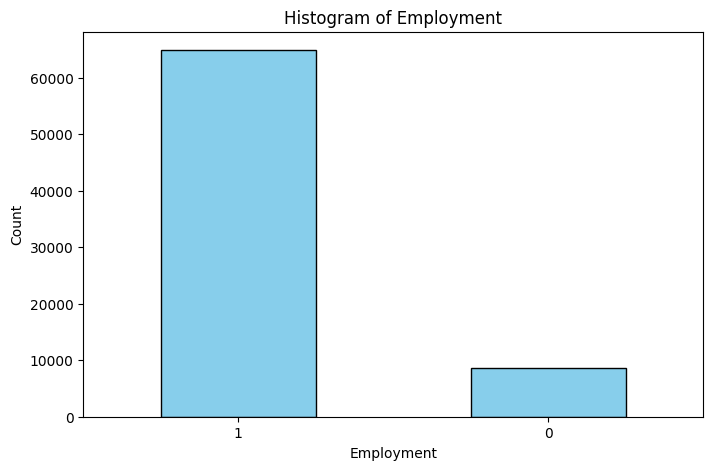

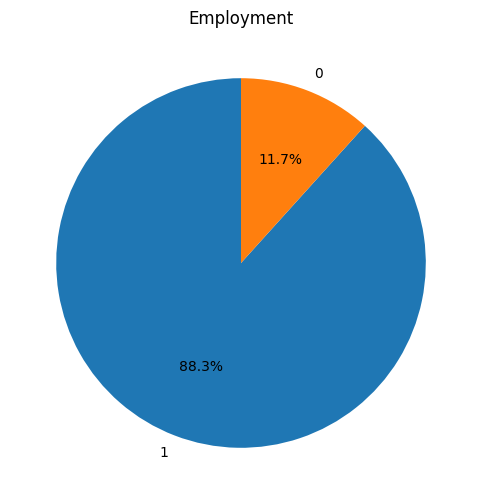

Gender
Gender
Man          68573
Woman         3518
NonBinary     1371
Name: count, dtype: int64


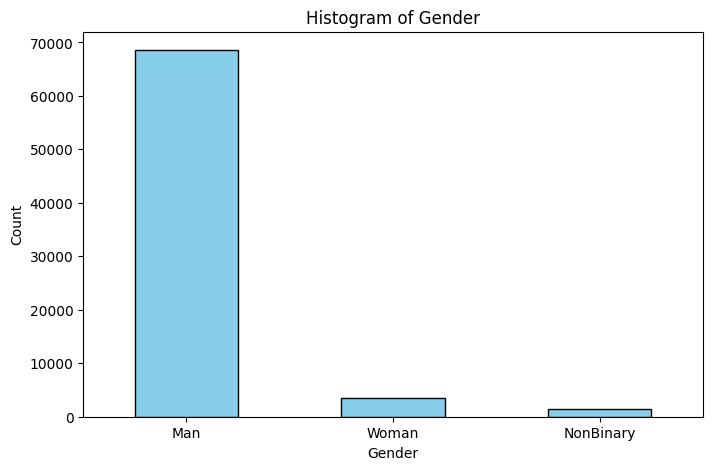

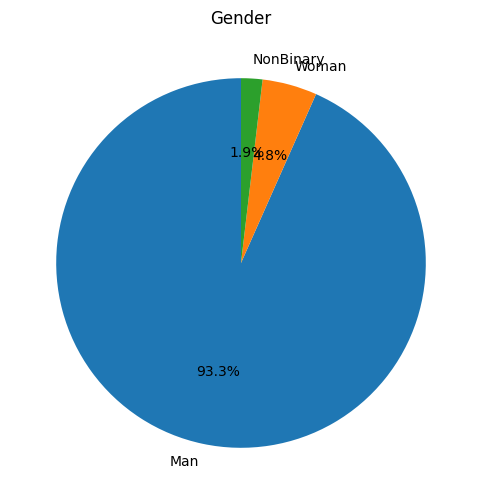

MentalHealth
MentalHealth
No     56944
Yes    16518
Name: count, dtype: int64


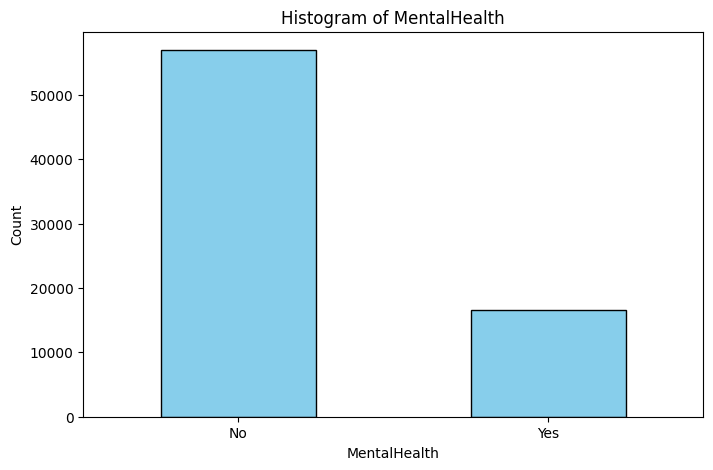

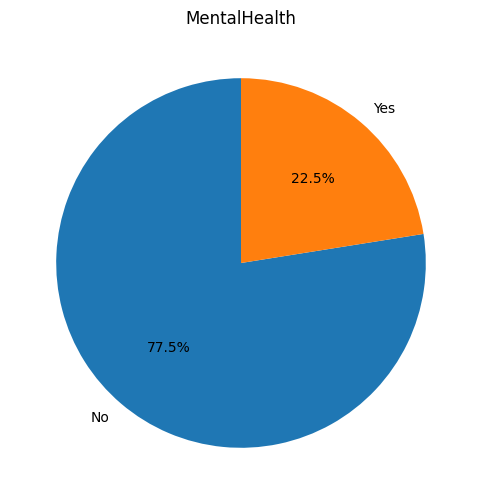

MainBranch
MainBranch
Dev       67396
NotDev     6066
Name: count, dtype: int64


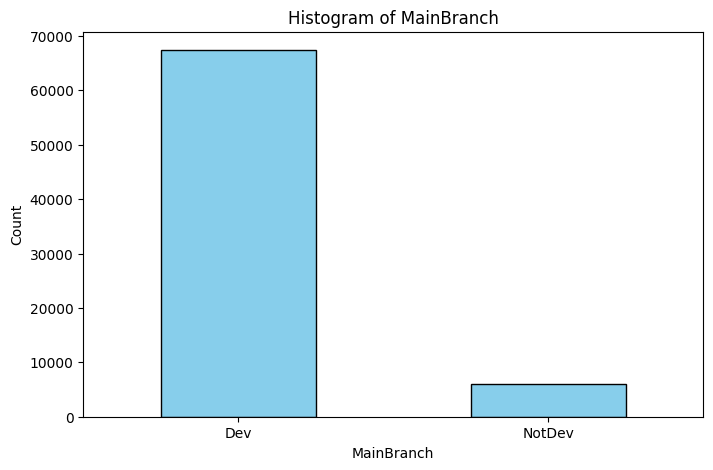

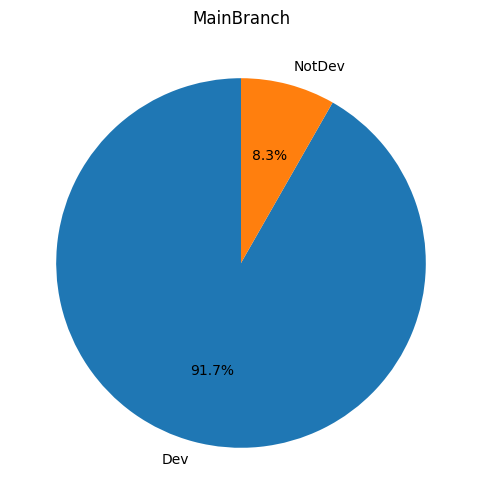

YearsCode
YearsCode
10    6345
8     4606
7     4500
6     4384
5     4204
15    4142
12    3872
20    3697
9     3116
4     2848
11    2532
14    2375
13    2286
25    2140
3     1949
16    1865
30    1656
18    1646
17    1603
22    1377
2     1134
35     941
23     935
21     868
24     845
19     808
40     791
27     631
26     622
28     514
32     413
1      364
37     350
38     342
33     307
34     294
36     290
29     259
31     216
42     210
39     190
0      187
41     166
45     153
43     124
50     122
44     101
46      57
47      35
48      26
49      24
Name: count, dtype: int64


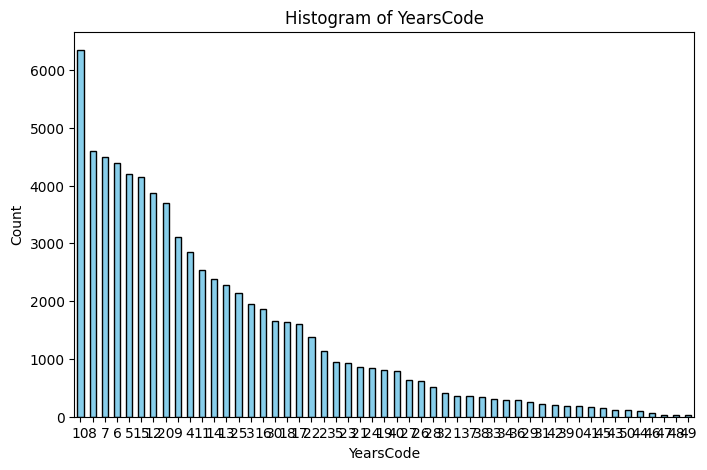

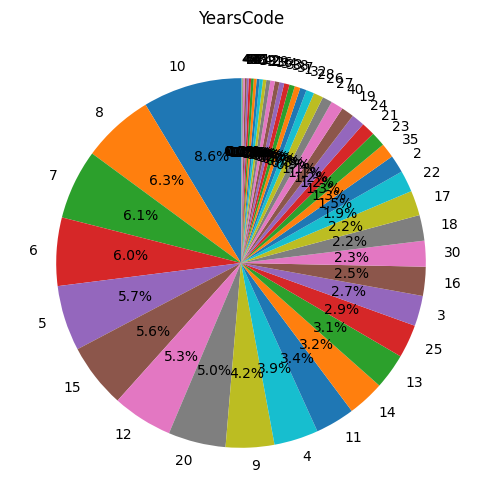

YearsCodePro
YearsCodePro
3     6717
5     6209
2     6114
4     5904
6     4786
10    4557
7     4040
8     3734
1     3634
0     2943
15    2566
9     2375
12    2272
11    1986
20    1903
13    1484
14    1425
16    1200
25    1052
17     973
22     969
18     922
21     735
23     585
30     572
24     528
19     496
26     374
27     310
28     264
35     259
32     220
31     164
40     150
29     150
36     144
33     137
34     125
37      98
38      86
42      53
39      46
41      45
43      37
50      31
44      29
45      23
46      11
47       9
48       9
49       7
Name: count, dtype: int64


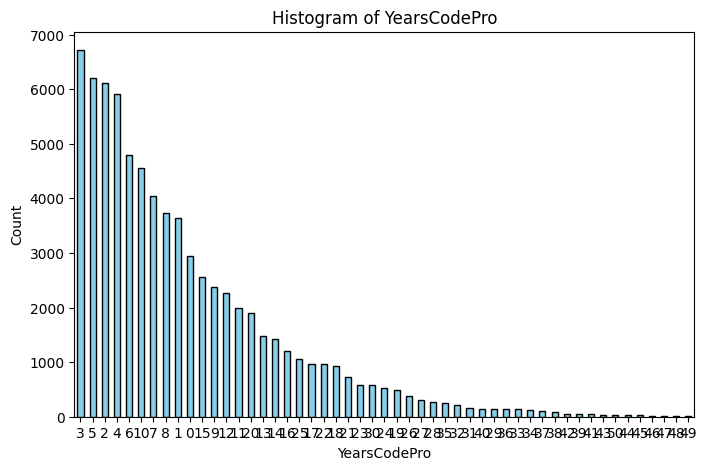

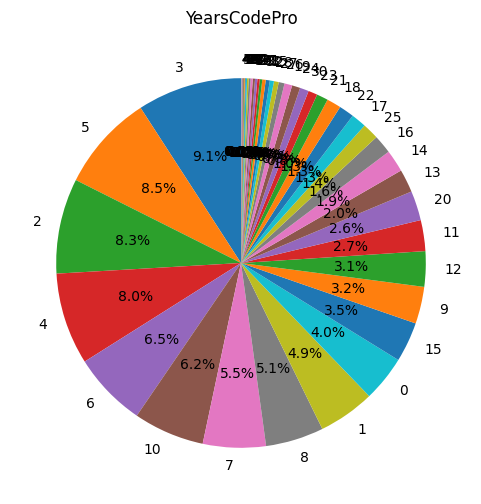

Country
Country
United States of America                                14696
Germany                                                  5395
India                                                    5360
United Kingdom of Great Britain and Northern Ireland     4688
Canada                                                   2779
                                                        ...  
Mauritania                                                  1
Burundi                                                     1
Saint Kitts and Nevis                                       1
Monaco                                                      1
Seychelles                                                  1
Name: count, Length: 172, dtype: int64


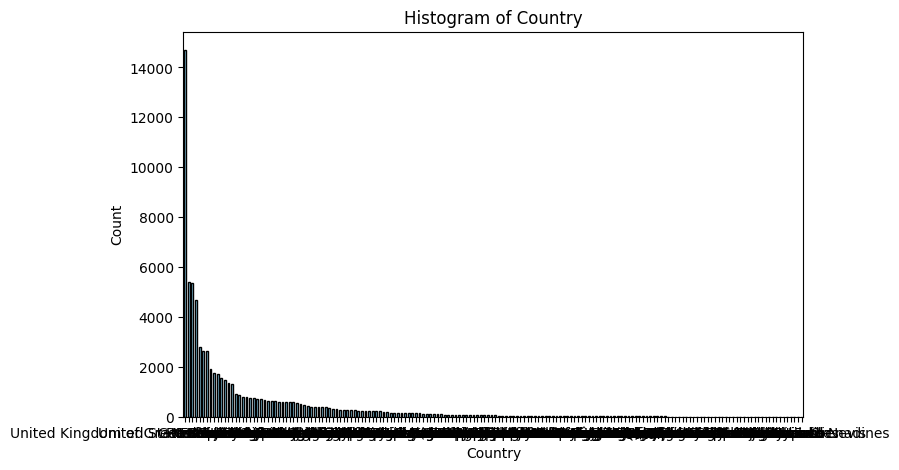

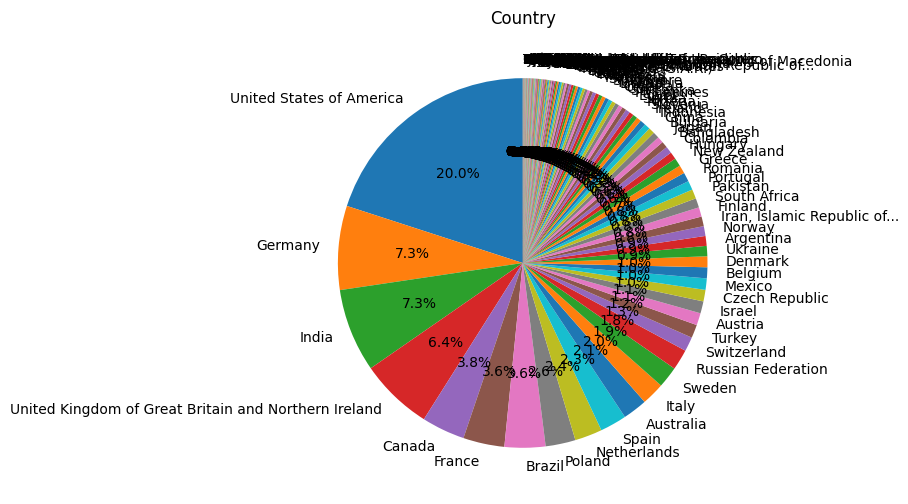

PreviousSalary
PreviousSalary
150000.0    806
120000.0    711
200000.0    627
100000.0    617
130000.0    516
           ... 
34186.0       1
84660.0       1
65448.0       1
23604.0       1
110245.0      1
Name: count, Length: 12062, dtype: int64


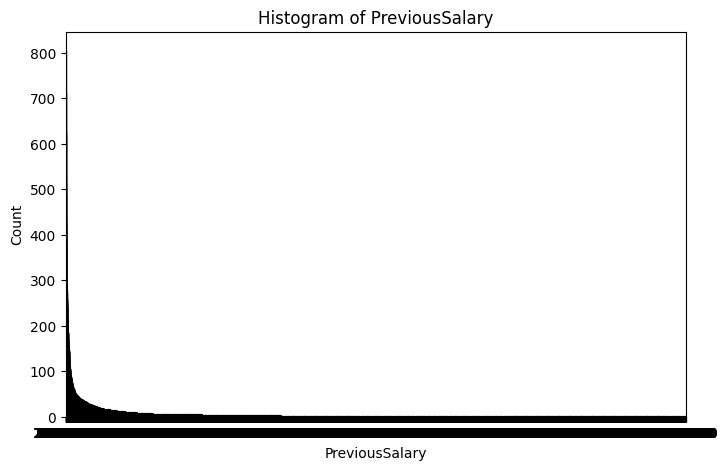

KeyboardInterrupt: 

In [14]:
column_of_interest = 'Age'

for column_of_interest in df.columns[1:]:
  print(column_of_interest)

  value_counts = df[column_of_interest].value_counts()
  print(value_counts)

  plt.figure(figsize=(8, 5))
  value_counts.plot(kind='bar', color='skyblue', edgecolor='black')
  plt.xlabel(column_of_interest)
  plt.ylabel('Count')
  plt.title(f'Histogram of {column_of_interest}')
  plt.xticks(rotation=0)
  plt.show()

  plt.figure(figsize=(6, 6))
  value_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
  plt.ylabel('')
  plt.title(column_of_interest)
  plt.show()

Accessibility
No     71355
Yes     2107
Name: count, dtype: int64


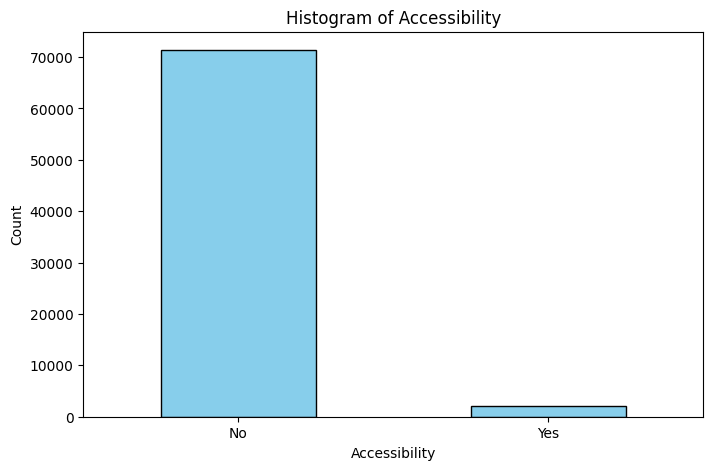

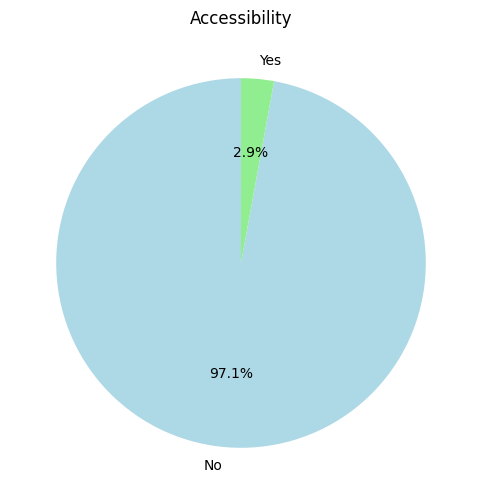

In [20]:
column_of_interest = 'Accessibility'

value_counts = df[column_of_interest].value_counts()
print(value_counts)

plt.figure(figsize=(8, 5))
value_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel(column_of_interest)
plt.ylabel('Count')
plt.title(f'Histogram of {column_of_interest}')
plt.xticks(rotation=0)
plt.show()

plt.figure(figsize=(6, 6))
value_counts.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'lightcoral'], startangle=90)
plt.ylabel('')
plt.title(column_of_interest)
plt.show()

EdLevel
Undergraduate    37402
Master           18903
Other            10843
NoHigherEd        3706
PhD               2608
Name: count, dtype: int64


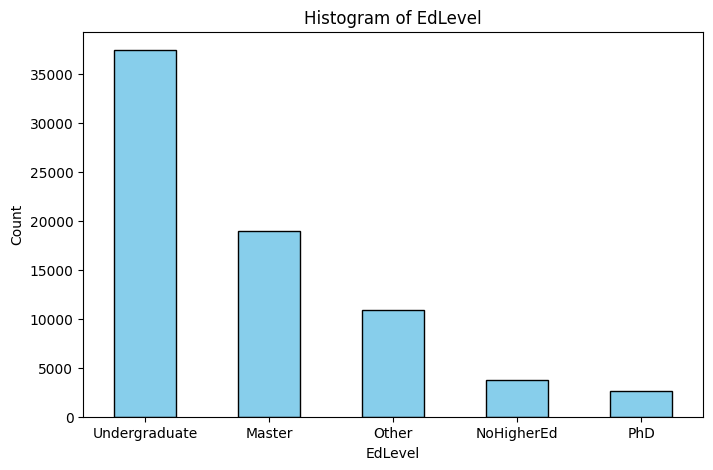

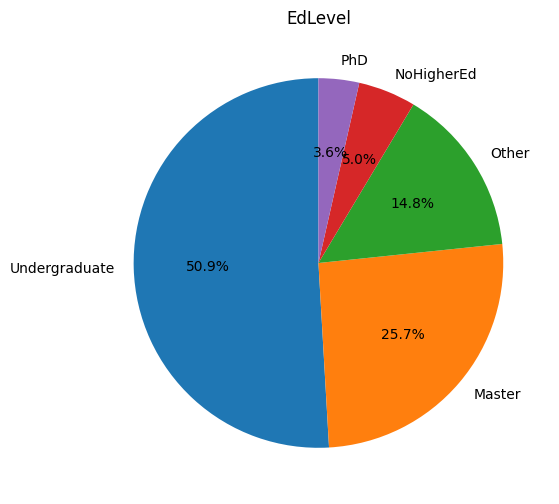

In [22]:
column_of_interest = 'EdLevel'

value_counts = df[column_of_interest].value_counts()
print(value_counts)

plt.figure(figsize=(8, 5))
value_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel(column_of_interest)
plt.ylabel('Count')
plt.title(f'Histogram of {column_of_interest}')
plt.xticks(rotation=0)
plt.show()

plt.figure(figsize=(6, 6))
value_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.ylabel('')
plt.title(column_of_interest)
plt.show()

Проверим есть ли пустые значения

In [ ]:
df.isnull()

,Unnamed: 0,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73457,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
73458,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
73459,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
73460,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
Age,0
Accessibility,0
EdLevel,0
Employment,0
Gender,0
MentalHealth,0
MainBranch,0
YearsCode,0
YearsCodePro,0


Есть 63 пустых значения в колонке "Технологии, с которыми работали"

Посчитаем сколько это будет в процентах от общего количества записей

In [ ]:
(100* df.isnull().sum() / len(df))['HaveWorkedWith']

0.08575862350603033

Меньше процента

Посмотрим на эти записи

In [ ]:
df[df['HaveWorkedWith'].isnull()]

,Unnamed: 0,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed
1161,1161,>35,No,Undergraduate,1,Man,Yes,Dev,36,32,Switzerland,96566.0,NaN,0,0
2443,2443,>35,No,Other,1,Man,No,Dev,7,6,United States of America,85000.0,NaN,0,0
2533,2533,>35,No,PhD,1,Man,No,NotDev,37,0,Germany,76020.0,NaN,0,0
2657,2657,<35,No,Master,0,Woman,No,Dev,11,5,Portugal,31428.0,NaN,0,0
5797,5797,<35,No,Undergraduate,1,Man,No,Dev,8,4,India,70368.0,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69865,69865,<35,No,Other,1,Man,No,Dev,0,0,Colombia,6036.0,NaN,0,0
71795,71795,<35,No,Undergraduate,1,Man,No,Dev,7,3,Bangladesh,5460.0,NaN,0,0
72153,72153,>35,Yes,Other,1,Man,No,NotDev,12,2,Germany,106644.0,NaN,0,0
72588,72588,<35,No,Other,1,Man,Yes,Dev,10,6,Spain,41058.0,NaN,0,0


Вероятно, эти данные или потеряны, или не были заполнены, или заполнены некорректно так как все эти люди не трудоустроены, хотя заявлено, что они программировали профессионально какое-то количество лет. Следовательно, они должны были работать с какими-то технологиями, но в датасете этого нет. Значит, данные ошибочны

Удалим строки с пустыми значениями 'HaveWorkedWith'.

In [ ]:
df.dropna(subset=['HaveWorkedWith'], inplace=True)

Проверим остались ли столбцы с пустыми значениями.

In [ ]:
df.columns[df.isnull().sum() > 0]

Index([], dtype='object')

Уберем второй (дублирующийся) столбец с индексами

In [ ]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [ ]:
df

,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed
0,<35,No,Master,1,Man,No,Dev,7,4,Sweden,51552.0,C++;Python;Git;PostgreSQL,4,0
1,<35,No,Undergraduate,1,Man,No,Dev,12,5,Spain,46482.0,Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...,12,1
2,<35,No,Master,1,Man,No,Dev,15,6,Germany,77290.0,C;C++;Java;Perl;Ruby;Git;Ruby on Rails,7,0
3,<35,No,Undergraduate,1,Man,No,Dev,9,6,Canada,46135.0,Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL;Gi...,13,0
4,>35,No,PhD,0,Man,No,NotDev,40,30,Singapore,160932.0,C++;Python,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73457,<35,No,Undergraduate,1,Man,No,Dev,7,2,Germany,41058.0,C#;HTML/CSS;JavaScript;TypeScript;Docker;Kuber...,13,1
73458,>35,No,Undergraduate,1,Man,No,Dev,21,16,United States of America,115000.0,C#;HTML/CSS;Java;JavaScript;npm;ASP.NET Core ;...,11,1
73459,<35,No,Undergraduate,1,Man,No,Dev,4,3,Nigeria,57720.0,HTML/CSS;JavaScript;TypeScript;Docker;Express;...,12,1
73460,<35,Yes,Undergraduate,1,Man,Yes,Dev,5,1,United States of America,70000.0,C#;HTML/CSS;JavaScript;SQL;TypeScript;npm;Yarn...,15,1


Было 73462 строки. Стало 73399

Теперь будем преобразовывать категориальные столбцы в числовые для дальнейшей работы

Преобразовываем столбец "Age"

In [ ]:
df['Age'] = df['Age'].apply(lambda x: 1 if x == '<35' else 0)
df.rename(columns={'Age': 'Age: <35 Years'}, inplace=True)

In [ ]:
df

,Age: <35 Years,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed
0,1,No,Master,1,Man,No,Dev,7,4,Sweden,51552.0,C++;Python;Git;PostgreSQL,4,0
1,1,No,Undergraduate,1,Man,No,Dev,12,5,Spain,46482.0,Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...,12,1
2,1,No,Master,1,Man,No,Dev,15,6,Germany,77290.0,C;C++;Java;Perl;Ruby;Git;Ruby on Rails,7,0
3,1,No,Undergraduate,1,Man,No,Dev,9,6,Canada,46135.0,Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL;Gi...,13,0
4,0,No,PhD,0,Man,No,NotDev,40,30,Singapore,160932.0,C++;Python,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73457,1,No,Undergraduate,1,Man,No,Dev,7,2,Germany,41058.0,C#;HTML/CSS;JavaScript;TypeScript;Docker;Kuber...,13,1
73458,0,No,Undergraduate,1,Man,No,Dev,21,16,United States of America,115000.0,C#;HTML/CSS;Java;JavaScript;npm;ASP.NET Core ;...,11,1
73459,1,No,Undergraduate,1,Man,No,Dev,4,3,Nigeria,57720.0,HTML/CSS;JavaScript;TypeScript;Docker;Express;...,12,1
73460,1,Yes,Undergraduate,1,Man,Yes,Dev,5,1,United States of America,70000.0,C#;HTML/CSS;JavaScript;SQL;TypeScript;npm;Yarn...,15,1


Преобразовываем столбец "Accessibility"

In [ ]:
df['Accessibility'] = df['Accessibility'].apply(lambda x: 1 if x == 'Yes' else 0)

In [ ]:
df

,Age: <35 Years,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed
0,1,0,Master,1,Man,No,Dev,7,4,Sweden,51552.0,C++;Python;Git;PostgreSQL,4,0
1,1,0,Undergraduate,1,Man,No,Dev,12,5,Spain,46482.0,Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...,12,1
2,1,0,Master,1,Man,No,Dev,15,6,Germany,77290.0,C;C++;Java;Perl;Ruby;Git;Ruby on Rails,7,0
3,1,0,Undergraduate,1,Man,No,Dev,9,6,Canada,46135.0,Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL;Gi...,13,0
4,0,0,PhD,0,Man,No,NotDev,40,30,Singapore,160932.0,C++;Python,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73457,1,0,Undergraduate,1,Man,No,Dev,7,2,Germany,41058.0,C#;HTML/CSS;JavaScript;TypeScript;Docker;Kuber...,13,1
73458,0,0,Undergraduate,1,Man,No,Dev,21,16,United States of America,115000.0,C#;HTML/CSS;Java;JavaScript;npm;ASP.NET Core ;...,11,1
73459,1,0,Undergraduate,1,Man,No,Dev,4,3,Nigeria,57720.0,HTML/CSS;JavaScript;TypeScript;Docker;Express;...,12,1
73460,1,1,Undergraduate,1,Man,Yes,Dev,5,1,United States of America,70000.0,C#;HTML/CSS;JavaScript;SQL;TypeScript;npm;Yarn...,15,1


Преобразовываем столбец "EdLevel"

In [ ]:
education_mapping = {
    'NoHigherEd': 0,
    'Undergraduate': 1,
    'Master': 2,
    'PhD': 3,
    'Other': 4
}
df['EdLevel'] = df['EdLevel'].map(education_mapping)

In [ ]:
df

,Age: <35 Years,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed
0,1,0,2,1,Man,No,Dev,7,4,Sweden,51552.0,C++;Python;Git;PostgreSQL,4,0
1,1,0,1,1,Man,No,Dev,12,5,Spain,46482.0,Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...,12,1
2,1,0,2,1,Man,No,Dev,15,6,Germany,77290.0,C;C++;Java;Perl;Ruby;Git;Ruby on Rails,7,0
3,1,0,1,1,Man,No,Dev,9,6,Canada,46135.0,Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL;Gi...,13,0
4,0,0,3,0,Man,No,NotDev,40,30,Singapore,160932.0,C++;Python,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73457,1,0,1,1,Man,No,Dev,7,2,Germany,41058.0,C#;HTML/CSS;JavaScript;TypeScript;Docker;Kuber...,13,1
73458,0,0,1,1,Man,No,Dev,21,16,United States of America,115000.0,C#;HTML/CSS;Java;JavaScript;npm;ASP.NET Core ;...,11,1
73459,1,0,1,1,Man,No,Dev,4,3,Nigeria,57720.0,HTML/CSS;JavaScript;TypeScript;Docker;Express;...,12,1
73460,1,1,1,1,Man,Yes,Dev,5,1,United States of America,70000.0,C#;HTML/CSS;JavaScript;SQL;TypeScript;npm;Yarn...,15,1


Преобразовываем столбец "Gender"

Для удобства заменим значение 'NonBinary' в столбце 'Gender' на 'Other'

In [ ]:
df['Gender'] = df['Gender'].replace('NonBinary', 'Other')

In [ ]:
df = pd.get_dummies(df, columns=['Gender'], prefix='Gender', dtype=int)

In [ ]:
df

,Age: <35 Years,Accessibility,EdLevel,Employment,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed,Gender_Man,Gender_Other,Gender_Woman
0,1,0,2,1,No,Dev,7,4,Sweden,51552.0,C++;Python;Git;PostgreSQL,4,0,1,0,0
1,1,0,1,1,No,Dev,12,5,Spain,46482.0,Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...,12,1,1,0,0
2,1,0,2,1,No,Dev,15,6,Germany,77290.0,C;C++;Java;Perl;Ruby;Git;Ruby on Rails,7,0,1,0,0
3,1,0,1,1,No,Dev,9,6,Canada,46135.0,Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL;Gi...,13,0,1,0,0
4,0,0,3,0,No,NotDev,40,30,Singapore,160932.0,C++;Python,2,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73457,1,0,1,1,No,Dev,7,2,Germany,41058.0,C#;HTML/CSS;JavaScript;TypeScript;Docker;Kuber...,13,1,1,0,0
73458,0,0,1,1,No,Dev,21,16,United States of America,115000.0,C#;HTML/CSS;Java;JavaScript;npm;ASP.NET Core ;...,11,1,1,0,0
73459,1,0,1,1,No,Dev,4,3,Nigeria,57720.0,HTML/CSS;JavaScript;TypeScript;Docker;Express;...,12,1,1,0,0
73460,1,1,1,1,Yes,Dev,5,1,United States of America,70000.0,C#;HTML/CSS;JavaScript;SQL;TypeScript;npm;Yarn...,15,1,1,0,0


Преобразовываем столбец "MentalHealth"

In [ ]:
df['MentalHealth'] = df['MentalHealth'].apply(lambda x: 1 if x == 'Yes' else 0)

In [ ]:
df

,Age: <35 Years,Accessibility,EdLevel,Employment,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed,Gender_Man,Gender_Other,Gender_Woman
0,1,0,2,1,0,Dev,7,4,Sweden,51552.0,C++;Python;Git;PostgreSQL,4,0,1,0,0
1,1,0,1,1,0,Dev,12,5,Spain,46482.0,Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...,12,1,1,0,0
2,1,0,2,1,0,Dev,15,6,Germany,77290.0,C;C++;Java;Perl;Ruby;Git;Ruby on Rails,7,0,1,0,0
3,1,0,1,1,0,Dev,9,6,Canada,46135.0,Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL;Gi...,13,0,1,0,0
4,0,0,3,0,0,NotDev,40,30,Singapore,160932.0,C++;Python,2,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73457,1,0,1,1,0,Dev,7,2,Germany,41058.0,C#;HTML/CSS;JavaScript;TypeScript;Docker;Kuber...,13,1,1,0,0
73458,0,0,1,1,0,Dev,21,16,United States of America,115000.0,C#;HTML/CSS;Java;JavaScript;npm;ASP.NET Core ;...,11,1,1,0,0
73459,1,0,1,1,0,Dev,4,3,Nigeria,57720.0,HTML/CSS;JavaScript;TypeScript;Docker;Express;...,12,1,1,0,0
73460,1,1,1,1,1,Dev,5,1,United States of America,70000.0,C#;HTML/CSS;JavaScript;SQL;TypeScript;npm;Yarn...,15,1,1,0,0


Преобразовываем столбец "MainBranch"

In [ ]:
df['MainBranch'] = df['MainBranch'].apply(lambda x: 1 if x == 'Dev' else 0)

In [ ]:
df

,Age: <35 Years,Accessibility,EdLevel,Employment,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed,Gender_Man,Gender_Other,Gender_Woman
0,1,0,2,1,0,1,7,4,Sweden,51552.0,C++;Python;Git;PostgreSQL,4,0,1,0,0
1,1,0,1,1,0,1,12,5,Spain,46482.0,Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...,12,1,1,0,0
2,1,0,2,1,0,1,15,6,Germany,77290.0,C;C++;Java;Perl;Ruby;Git;Ruby on Rails,7,0,1,0,0
3,1,0,1,1,0,1,9,6,Canada,46135.0,Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL;Gi...,13,0,1,0,0
4,0,0,3,0,0,0,40,30,Singapore,160932.0,C++;Python,2,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73457,1,0,1,1,0,1,7,2,Germany,41058.0,C#;HTML/CSS;JavaScript;TypeScript;Docker;Kuber...,13,1,1,0,0
73458,0,0,1,1,0,1,21,16,United States of America,115000.0,C#;HTML/CSS;Java;JavaScript;npm;ASP.NET Core ;...,11,1,1,0,0
73459,1,0,1,1,0,1,4,3,Nigeria,57720.0,HTML/CSS;JavaScript;TypeScript;Docker;Express;...,12,1,1,0,0
73460,1,1,1,1,1,1,5,1,United States of America,70000.0,C#;HTML/CSS;JavaScript;SQL;TypeScript;npm;Yarn...,15,1,1,0,0


Преобразовываем столбец "Country"

In [ ]:
threshold = 500 # Определяем порог для "редких" стран
country_counts = df['Country'].value_counts()
rare_countries = country_counts[country_counts < threshold].index
df['Country'] = df['Country'].apply(lambda x: 'Other' if x in rare_countries else x)
df = pd.get_dummies(df, columns=['Country'], prefix='Country', dtype=int)

In [ ]:
df

,Age: <35 Years,Accessibility,EdLevel,Employment,MentalHealth,MainBranch,YearsCode,YearsCodePro,PreviousSalary,HaveWorkedWith,...,Country_Romania,Country_Russian Federation,Country_South Africa,Country_Spain,Country_Sweden,Country_Switzerland,Country_Turkey,Country_Ukraine,Country_United Kingdom of Great Britain and Northern Ireland,Country_United States of America
0,1,0,2,1,0,1,7,4,51552.0,C++;Python;Git;PostgreSQL,...,0,0,0,0,1,0,0,0,0,0
1,1,0,1,1,0,1,12,5,46482.0,Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...,...,0,0,0,1,0,0,0,0,0,0
2,1,0,2,1,0,1,15,6,77290.0,C;C++;Java;Perl;Ruby;Git;Ruby on Rails,...,0,0,0,0,0,0,0,0,0,0
3,1,0,1,1,0,1,9,6,46135.0,Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL;Gi...,...,0,0,0,0,0,0,0,0,0,0
4,0,0,3,0,0,0,40,30,160932.0,C++;Python,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73457,1,0,1,1,0,1,7,2,41058.0,C#;HTML/CSS;JavaScript;TypeScript;Docker;Kuber...,...,0,0,0,0,0,0,0,0,0,0
73458,0,0,1,1,0,1,21,16,115000.0,C#;HTML/CSS;Java;JavaScript;npm;ASP.NET Core ;...,...,0,0,0,0,0,0,0,0,0,1
73459,1,0,1,1,0,1,4,3,57720.0,HTML/CSS;JavaScript;TypeScript;Docker;Express;...,...,0,0,0,0,0,0,0,0,0,0
73460,1,1,1,1,1,1,5,1,70000.0,C#;HTML/CSS;JavaScript;SQL;TypeScript;npm;Yarn...,...,0,0,0,0,0,0,0,0,0,1


Преобразовываем столбец "HaveWorkedWith"

In [ ]:
# Обработка столбца 'HaveWorkedWith'
from collections import defaultdict

tech_counts = defaultdict(int)
for tech_list in df['HaveWorkedWith'].dropna():
    for tech in tech_list.split(';'):
        tech_counts[tech] += 1
threshold_tech = 5000  # Порог для определения редких технологий
def replace_rare_techs(tech_list):
    if pd.isna(tech_list):
        return tech_list
    techs = tech_list.split(';')
    techs = [tech if tech_counts[tech] >= threshold_tech else 'Other' for tech in techs]
    return ';'.join(techs)
df['HaveWorkedWith'] = df['HaveWorkedWith'].apply(replace_rare_techs)
technologies = set(tech for tech, count in tech_counts.items() if count >= threshold_tech)
technologies.add('Other')
tech_data = {f'Tech_{tech}': df['HaveWorkedWith'].apply(lambda x: 1 if tech in str(x) else 0) for tech in technologies}
tech_df = pd.DataFrame(tech_data)
df = pd.concat([df, tech_df], axis=1)
df.drop(columns=['HaveWorkedWith'], inplace=True)

In [ ]:
df

,Age: <35 Years,Accessibility,EdLevel,Employment,MentalHealth,MainBranch,YearsCode,YearsCodePro,PreviousSalary,ComputerSkills,...,Tech_Bash/Shell,Tech_Microsoft SQL Server,Tech_DynamoDB,Tech_Homebrew,Tech_Heroku,Tech_Express,Tech_Django,Tech_Kubernetes,Tech_Angular,Tech_Kotlin
0,1,0,2,1,0,1,7,4,51552.0,4,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,1,0,1,12,5,46482.0,12,...,1,0,0,0,0,1,0,0,0,0
2,1,0,2,1,0,1,15,6,77290.0,7,...,0,0,0,0,0,0,0,0,0,0
3,1,0,1,1,0,1,9,6,46135.0,13,...,1,0,0,0,0,0,0,0,0,0
4,0,0,3,0,0,0,40,30,160932.0,2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73457,1,0,1,1,0,1,7,2,41058.0,13,...,0,0,0,0,0,0,0,1,1,0
73458,0,0,1,1,0,1,21,16,115000.0,11,...,0,0,0,0,0,0,0,0,0,0
73459,1,0,1,1,0,1,4,3,57720.0,12,...,0,0,0,0,1,1,0,0,0,0
73460,1,1,1,1,1,1,5,1,70000.0,15,...,0,1,1,0,0,0,0,0,1,0


Теперь выведем список столбцов, для которых существует высокая корреляция, а также высокая обратная корреляция с другими столбцами  

Корреляция между 'Age: <35 Years' и 'YearsCodePro': -0.6897


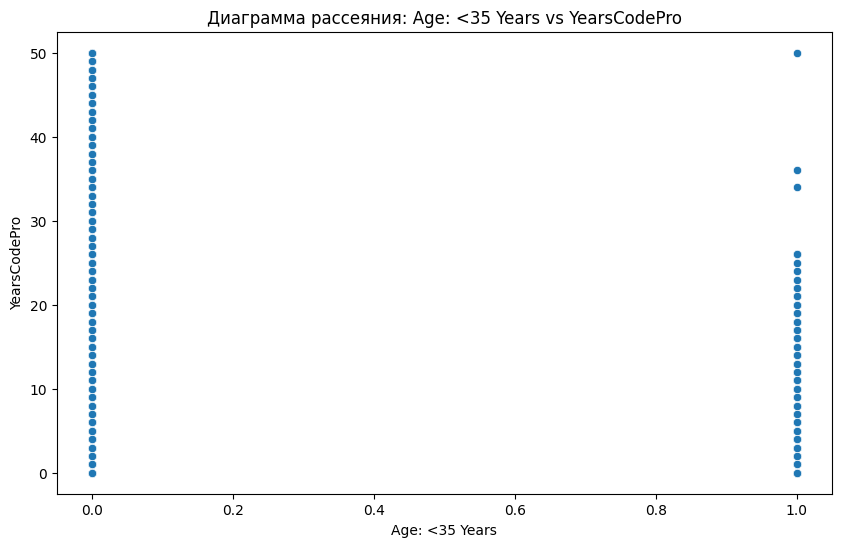


Корреляция между 'Age: <35 Years' и 'YearsCode': -0.6774


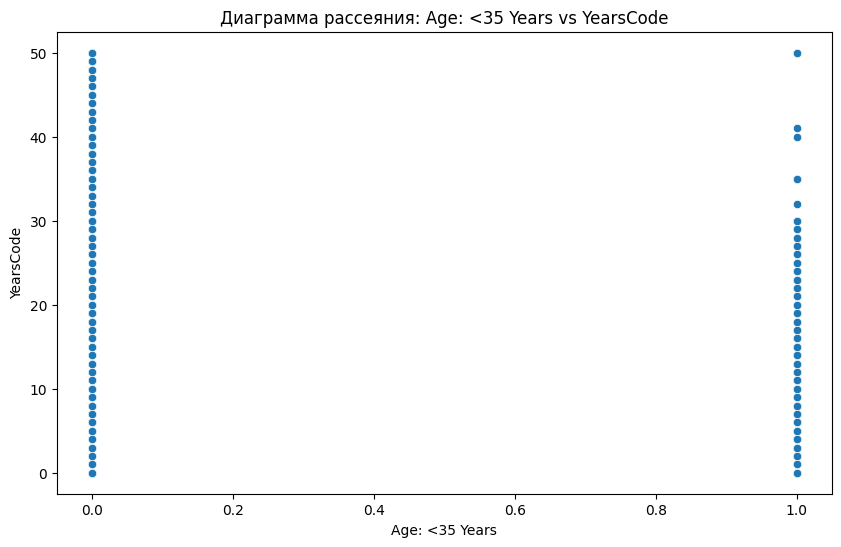


Корреляция между 'YearsCode' и 'YearsCodePro': 0.9012


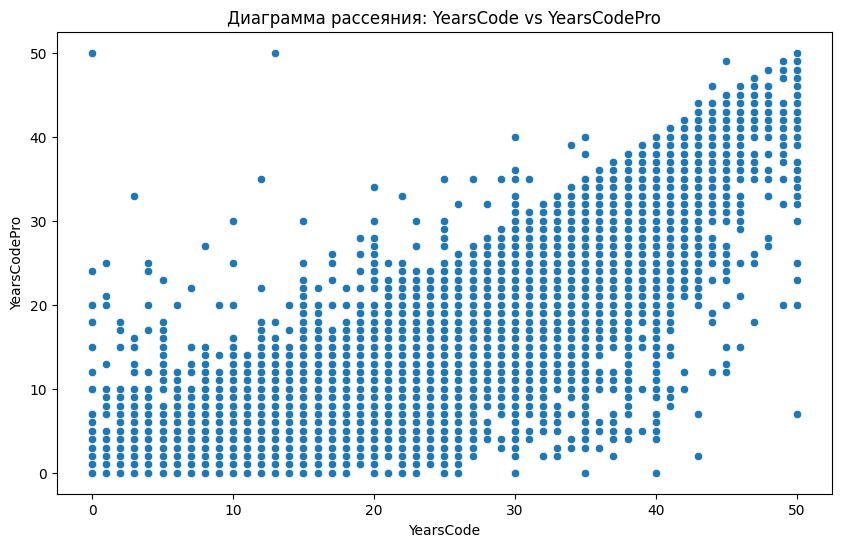


Корреляция между 'PreviousSalary' и 'Country_United States of America': 0.5662


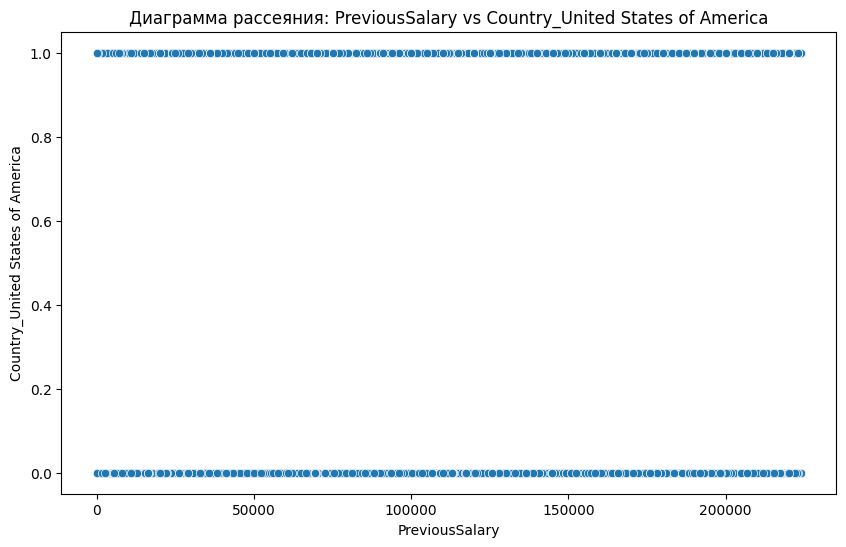


Корреляция между 'ComputerSkills' и 'Employed': 0.5850


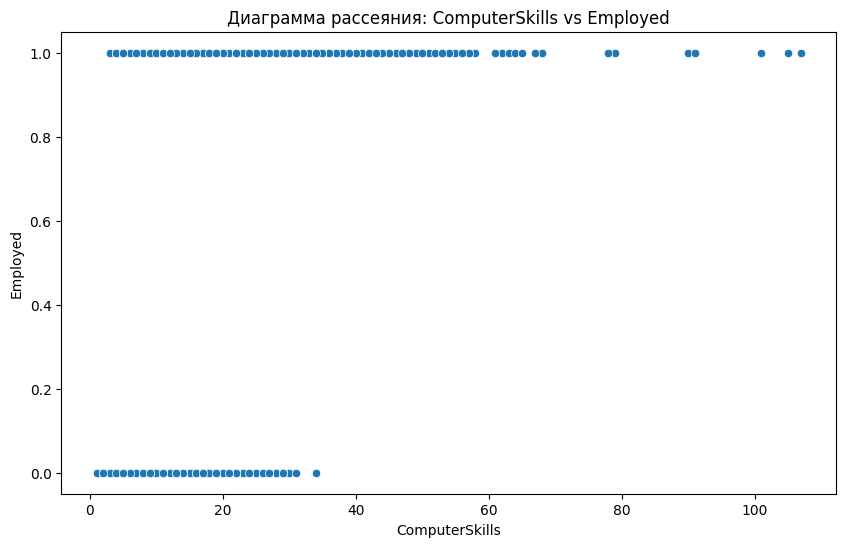

In [ ]:
# Фильтруем корреляции, которые больше 0.5 или меньше -0.5
filtr_corr = df.corr()[(df.corr() > 0.5) | (df.corr() < -0.5)]

# Устанавливаем значения на главной диагонали в NaN
np.fill_diagonal(filtr_corr.values, np.nan)

# Получаем уникальные названия столбцов, которые имеют хотя бы одну корреляцию
columns_with_high_corr = filtr_corr.columns[filtr_corr.notna().any()]

# Множество для хранения уже выведенных пар
seen_pairs = set()

# Проходим по каждому столбцу и выводим корреляции
for column in columns_with_high_corr:
    correlations = df.corr()[column].loc[lambda x: (x > 0.5) | (x < -0.5)].sort_values().drop(column)

    for correlated_column, value in correlations.items():
        # Создаем упорядоченную пару для избежания дублирования
        pair = tuple(sorted([column, correlated_column]))

        if pair not in seen_pairs:
            # Проверяем, являются ли оба столбца бинарными или булевыми
            if (df[column].nunique() == 2 and set(df[column].unique()).issubset({0, 1})) and \
               (df[correlated_column].nunique() == 2 and set(df[correlated_column].unique()).issubset({0, 1})):
                continue  # Пропускаем пары, где оба столбца бинарные/булевые

            seen_pairs.add(pair)
            print(f"Корреляция между '{column}' и '{correlated_column}': {value:.4f}")

            # Создаем диаграмму рассеяния
            plt.figure(figsize=(10, 6))
            sns.scatterplot(x=df[column], y=df[correlated_column])

            # Добавляем заголовок и метки осей
            plt.title(f'Диаграмма рассеяния: {column} vs {correlated_column}')
            plt.xlabel(column)
            plt.ylabel(correlated_column)

            # Отображаем график
            plt.show()
            print()  # Пустая строка для разделения выводов

Из представленных диаграмм рассеивания нам интересны все, кроме 'PreviousSalary' vs 'Country_United States of America'.

Как видно по диаграмме рассеивания 'Age: <35 Years' vs 'YearsCodePro' выбросы наблюдаются

In [ ]:
df[(df['Age: <35 Years']==1) & (df['YearsCodePro']>30)]

,Age: <35 Years,Accessibility,EdLevel,Employment,MentalHealth,MainBranch,YearsCode,YearsCodePro,PreviousSalary,ComputerSkills,...,Tech_Bash/Shell,Tech_Microsoft SQL Server,Tech_DynamoDB,Tech_Homebrew,Tech_Heroku,Tech_Express,Tech_Django,Tech_Kubernetes,Tech_Angular,Tech_Kotlin
26491,1,0,1,1,0,1,20,34,47400.0,20,...,1,1,0,0,0,1,0,0,1,1
34790,1,0,1,0,1,1,50,50,9996.0,10,...,0,0,0,0,1,0,1,0,0,0
57970,1,1,2,1,1,1,40,36,158484.0,41,...,1,1,0,0,0,0,0,0,0,1


Как видно из выводы, опрошенным меньше 35 лет, однако они утверждают, что профессионально программируют на протяжении 34+ лет. Чтож, верится с трудом. Разумно будет удалить эти строки.

In [ ]:
df = df[~((df['Age: <35 Years'] == 1) & (df['YearsCodePro'] > 30))]

<Axes: xlabel='Age: <35 Years', ylabel='YearsCodePro'>

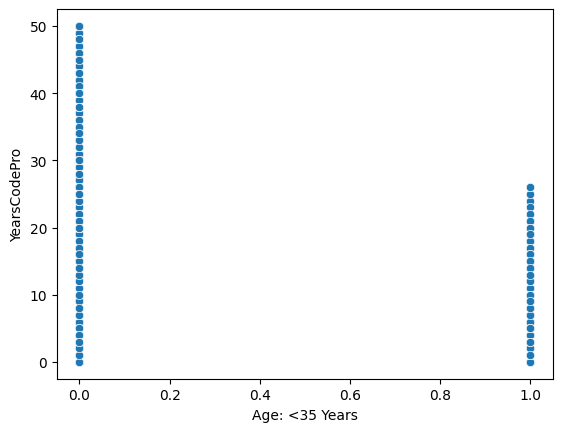

In [ ]:
sns.scatterplot(x='Age: <35 Years',y='YearsCodePro',data=df)

Выбросы пропали.

In [ ]:
df[(df['Age: <35 Years']==1) & (df['YearsCode']>30)]

,Age: <35 Years,Accessibility,EdLevel,Employment,MentalHealth,MainBranch,YearsCode,YearsCodePro,PreviousSalary,ComputerSkills,...,Tech_Bash/Shell,Tech_Microsoft SQL Server,Tech_DynamoDB,Tech_Homebrew,Tech_Heroku,Tech_Express,Tech_Django,Tech_Kubernetes,Tech_Angular,Tech_Kotlin
1788,1,0,1,1,1,1,32,10,79000.0,8,...,0,1,0,0,0,0,0,0,0,0
19123,1,0,4,1,0,1,35,16,147276.0,18,...,1,0,0,0,0,0,0,0,0,0
52503,1,0,2,1,0,1,50,20,64500.0,4,...,0,0,0,0,0,0,0,0,0,0
58907,1,0,2,1,0,1,35,26,126000.0,17,...,0,1,0,0,0,0,0,0,0,1
62254,1,0,0,1,1,1,41,8,17916.0,1,...,0,0,0,0,0,0,0,0,0,0


Как видим в случае с обычным программированием также есть выбросы, в которых опрашиваемые утверждают, что им меньше 35 лет, но они программируют 32+ года. Верится с трудом. Удалим эти строки.

In [ ]:
df = df[~((df['Age: <35 Years'] == 1) & (df['YearsCode'] > 30))]

<Axes: xlabel='Age: <35 Years', ylabel='YearsCode'>

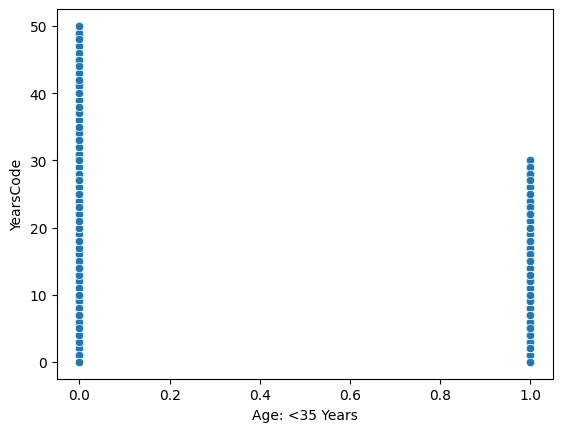

In [ ]:
sns.scatterplot(x='Age: <35 Years',y='YearsCode',data=df)

Выбросы пропали.

Далее смотрим диаграмму рассеивания для стобцов YearsCode и YearsCodePro. Видимо что сверху диаграммы есть точки, выглядещие как выбросы. Проведем диагональ от точки 0:10 до точки 40:50 и построим для нее уравнение y = x + 10. Таким образом, для точки (x, y) на диаграмме, чтобы она находилась выше этой диагонали, должно выполняться следующее условие: y >= 0.75x + 20. Снизу диаграммы таккже есть точки, напоминающие выбросы. Проведем диагональ от точки 30:0 до точки 50:25. Диагональ будет иметь уравнение: y = (25/20)(x − 30) или, упрощенно: y = 1.25(x − 30). Таким образом, для точки (x, y) на диаграмме, чтобы она находилась ниже этой диагонали, должно выполняться следующее условие: y <= 1.25(x − 30).

In [ ]:
# Удаляем строки, которые соответсвуют заданным диапазонамм
df = df[~((df['YearsCodePro'] >= df['YearsCode'] + 10) |
           (df['YearsCodePro'] <= 1.25 * (df['YearsCode'] - 30)))]

<Axes: xlabel='YearsCode', ylabel='YearsCodePro'>

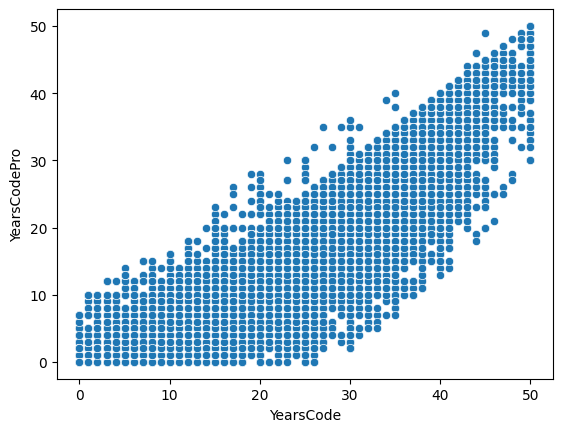

In [ ]:
sns.scatterplot(x='YearsCode',y='YearsCodePro',data=df)

Избавились от выбросов.

И последняя диаграмма рассеивания для ComputerSkills и Employed. Тут также видим выбросы. Удалим их.

In [ ]:
df = df[~((df['Employed'] == 1) & (df['ComputerSkills'] > 75))]

<Axes: xlabel='ComputerSkills', ylabel='Employed'>

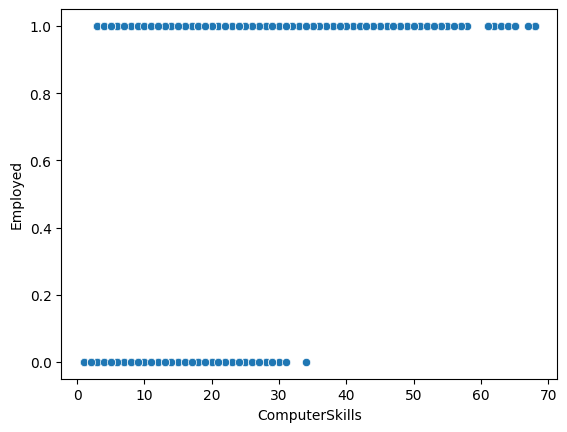

In [ ]:
sns.scatterplot(x='ComputerSkills',y='Employed',data=df)

Как видно выбросов стало меньше.

Сохраним обработанный датасет

In [ ]:
df

,Age: <35 Years,Accessibility,EdLevel,Employment,MentalHealth,MainBranch,YearsCode,YearsCodePro,PreviousSalary,ComputerSkills,...,Tech_Bash/Shell,Tech_Microsoft SQL Server,Tech_DynamoDB,Tech_Homebrew,Tech_Heroku,Tech_Express,Tech_Django,Tech_Kubernetes,Tech_Angular,Tech_Kotlin
0,1,0,2,1,0,1,7,4,51552.0,4,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,1,0,1,12,5,46482.0,12,...,1,0,0,0,0,1,0,0,0,0
2,1,0,2,1,0,1,15,6,77290.0,7,...,0,0,0,0,0,0,0,0,0,0
3,1,0,1,1,0,1,9,6,46135.0,13,...,1,0,0,0,0,0,0,0,0,0
4,0,0,3,0,0,0,40,30,160932.0,2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73457,1,0,1,1,0,1,7,2,41058.0,13,...,0,0,0,0,0,0,0,1,1,0
73458,0,0,1,1,0,1,21,16,115000.0,11,...,0,0,0,0,0,0,0,0,0,0
73459,1,0,1,1,0,1,4,3,57720.0,12,...,0,0,0,0,1,1,0,0,0,0
73460,1,1,1,1,1,1,5,1,70000.0,15,...,0,1,1,0,0,0,0,0,1,0


In [ ]:
df.to_csv('stackoverflow_full_cleaned.csv')

In [ ]:
files.download('stackoverflow_full_cleaned.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>